# COVID-19 in Australia (from covidlive.com.au)

NOTE: Because the [covidlive](https://covidlive.com.au/) database is being updated throughout the day, it only makes sense to run this notebook at the end of the day when all of the data has been loaded for the day. In the last cell of this notebook, I warn where last-day data is missing (or looks odd), but this is imperfect.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span><ul class="toc-item"><li><span><a href="#Usual-imports-etc." data-toc-modified-id="Usual-imports-etc.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Usual imports etc.</a></span></li><li><span><a href="#Other-useful-information" data-toc-modified-id="Other-useful-information-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Other useful information</a></span></li><li><span><a href="#Warnings" data-toc-modified-id="Warnings-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Warnings</a></span></li><li><span><a href="#State-populations-and-per-capita-calculations" data-toc-modified-id="State-populations-and-per-capita-calculations-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>State populations and per capita calculations</a></span></li></ul></li><li><span><a href="#Useful-functions" data-toc-modified-id="Useful-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Useful functions</a></span><ul class="toc-item"><li><span><a href="#Bar-charts---count-and-rate-per-capita" data-toc-modified-id="Bar-charts---count-and-rate-per-capita-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bar charts - count and rate per capita</a></span></li><li><span><a href="#State-line-plots" data-toc-modified-id="State-line-plots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>State line plots</a></span></li></ul></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the data</a></span></li><li><span><a href="#Capture-cumulative-and-daily-data-for-selected-columns" data-toc-modified-id="Capture-cumulative-and-daily-data-for-selected-columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Capture cumulative and daily data for selected columns</a></span></li><li><span><a href="#Weekly-charts" data-toc-modified-id="Weekly-charts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Weekly charts</a></span></li><li><span><a href="#Bar-Charts" data-toc-modified-id="Bar-Charts-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bar Charts</a></span></li><li><span><a href="#Active-Cases" data-toc-modified-id="Active-Cases-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Active Cases</a></span><ul class="toc-item"><li><span><a href="#Bar-chart-of-active-cases" data-toc-modified-id="Bar-chart-of-active-cases-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Bar chart of active cases</a></span></li><li><span><a href="#Active-cases---line-plots" data-toc-modified-id="Active-cases---line-plots-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Active cases - line plots</a></span></li></ul></li><li><span><a href="#Source-of-infection" data-toc-modified-id="Source-of-infection-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Source of infection</a></span><ul class="toc-item"><li><span><a href="#Extraction" data-toc-modified-id="Extraction-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Extraction</a></span></li><li><span><a href="#Check-latest-raw-SOI-data-against-raw-case-count-data" data-toc-modified-id="Check-latest-raw-SOI-data-against-raw-case-count-data-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Check latest raw SOI data against raw case count data</a></span></li><li><span><a href="#Plot-national-SOI" data-toc-modified-id="Plot-national-SOI-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Plot national SOI</a></span></li><li><span><a href="#Plot-cases-under-investigation-by-state" data-toc-modified-id="Plot-cases-under-investigation-by-state-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Plot cases under investigation by state</a></span></li></ul></li><li><span><a href="#Local-cases/transmission" data-toc-modified-id="Local-cases/transmission-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Local cases/transmission</a></span><ul class="toc-item"><li><span><a href="#Create-dataframe-of-local-transmission" data-toc-modified-id="Create-dataframe-of-local-transmission-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Create dataframe of local transmission</a></span></li><li><span><a href="#Bar-charts-cumulative-local-transmission" data-toc-modified-id="Bar-charts-cumulative-local-transmission-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Bar charts cumulative local transmission</a></span></li><li><span><a href="#Weekly-charts-for-local-transmission" data-toc-modified-id="Weekly-charts-for-local-transmission-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Weekly charts for local transmission</a></span></li><li><span><a href="#Recent-local-transmission-daily-charts" data-toc-modified-id="Recent-local-transmission-daily-charts-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Recent local transmission daily charts</a></span></li></ul></li><li><span><a href="#Local-outbreaks" data-toc-modified-id="Local-outbreaks-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Local outbreaks</a></span><ul class="toc-item"><li><span><a href="#Supporting-functions" data-toc-modified-id="Supporting-functions-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Supporting functions</a></span></li><li><span><a href="#Named-outbreaks" data-toc-modified-id="Named-outbreaks-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Named outbreaks</a></span></li><li><span><a href="#Outbreaks-on-a-log-scale" data-toc-modified-id="Outbreaks-on-a-log-scale-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Outbreaks on a log scale</a></span></li></ul></li><li><span><a href="#Outbreak-Growth-Factors" data-toc-modified-id="Outbreak-Growth-Factors-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Outbreak Growth Factors</a></span><ul class="toc-item"><li><span><a href="#Rolling-doubling-time" data-toc-modified-id="Rolling-doubling-time-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Rolling doubling time</a></span></li><li><span><a href="#Growth-Factors" data-toc-modified-id="Growth-Factors-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Growth Factors</a></span></li><li><span><a href="#Model-for-the-effective-reproduction-number-$R_t$" data-toc-modified-id="Model-for-the-effective-reproduction-number-$R_t$-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Model for the effective reproduction number $R_t$</a></span></li><li><span><a href="#Comparative-$R_t$-and-GF" data-toc-modified-id="Comparative-$R_t$-and-GF-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Comparative $R_t$ and GF</a></span></li><li><span><a href="#Short-run-projections-for-local-new-case-growth" data-toc-modified-id="Short-run-projections-for-local-new-case-growth-11.5"><span class="toc-item-num">11.5&nbsp;&nbsp;</span>Short-run projections for local new case growth</a></span></li></ul></li><li><span><a href="#Hospitalised" data-toc-modified-id="Hospitalised-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Hospitalised</a></span></li><li><span><a href="#Explore-cases-to-deaths-and-cases-to-hospitalisation-curves" data-toc-modified-id="Explore-cases-to-deaths-and-cases-to-hospitalisation-curves-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Explore cases to deaths and cases to hospitalisation curves</a></span><ul class="toc-item"><li><span><a href="#supporting-functions" data-toc-modified-id="supporting-functions-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>supporting functions</a></span></li><li><span><a href="#Establish-historical-baseline" data-toc-modified-id="Establish-historical-baseline-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Establish historical baseline</a></span></li><li><span><a href="#Use-above-baseline-to-look-at-the-recent-Sydney-Delta-outbreak" data-toc-modified-id="Use-above-baseline-to-look-at-the-recent-Sydney-Delta-outbreak-13.3"><span class="toc-item-num">13.3&nbsp;&nbsp;</span>Use above baseline to look at the recent Sydney Delta outbreak</a></span></li><li><span><a href="#Running-death-rates" data-toc-modified-id="Running-death-rates-13.4"><span class="toc-item-num">13.4&nbsp;&nbsp;</span>Running death rates</a></span></li><li><span><a href="#running-death-cumulative-sum" data-toc-modified-id="running-death-cumulative-sum-13.5"><span class="toc-item-num">13.5&nbsp;&nbsp;</span>running death cumulative sum</a></span></li><li><span><a href="#Active-cases-and-hospitalisations-(stock-statistics)" data-toc-modified-id="Active-cases-and-hospitalisations-(stock-statistics)-13.6"><span class="toc-item-num">13.6&nbsp;&nbsp;</span>Active cases and hospitalisations (stock statistics)</a></span></li></ul></li><li><span><a href="#Vaccination-plots" data-toc-modified-id="Vaccination-plots-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Vaccination plots</a></span></li><li><span><a href="#The-End" data-toc-modified-id="The-End-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>The End</a></span></li></ul></div>

## Python set-up

### Usual imports etc.

In [1]:
# global imports
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.units as munits
import matplotlib.dates as mdates
import datetime

from pathlib import Path
from typing import Dict, List

# local imports
sys.path.append(r'../bin')
import plotstuff as ps
import Henderson

# pandas
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# plotting
plt.style.use('ggplot')

# matplotlib stuff for date formatting xticklabels
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter
munits.registry[pd.Timestamp] = converter
munits.registry[pd.Period] = converter

### Other useful information

In [2]:
# save location
CHART_DIRECTORY = '../charts'
Path(CHART_DIRECTORY).mkdir(parents=True, exist_ok=True)
CHART_DIRECTORY += '/!AS2-'

SOURCE = 'Source: https://covidlive.com.au/'

AU_COLOURS = ['#dd0000', 'darkorange', 'gold', 'seagreen',
              'dodgerblue', 'blue', 'mediumorchid', 'hotpink',
              '#555555']  

# used in charts of the recent period
RECENT = 92 # days

# standard plot settings - used in calls to ps.finalise_plot()
std_barchart_settings ={
    'chart_directory': CHART_DIRECTORY,
    'rfooter': SOURCE,
    'show': True,
}

std_plot_settings = {
    'margins': 0.02,
    **std_barchart_settings, 
}

### Warnings

In [3]:
warning_count = 0
warnings = set()

def warn(message: str) -> None:
    global warning_count
    if message:
        if message not in warnings:
            warning_count += 1
        print(message)
        warnings.add(message)
    return None

def print_warnings() -> None:
    if warning_count == 0:
        return None
    
    print(f'NOTE: {warning_count} warning{"s" if warning_count > 1 else ""}')

    [print(m) for m in warnings]
    return None

### State populations and per capita calculations

In [4]:
# data compiled from ABS tables for age by year by state
# https://www.abs.gov.au/statistics/people/population/national-state-and-territory-population/dec-2020#data-download
# see notebook in directory ../abs, which generates the dictionaries below. 

# Constants across all tests
state_pop = {
    'NSW': 8167893,
    'Victoria': 6696630,
    'Queensland': 5176044,
    'SA': 1770494,
    'WA': 2663976,
    'Tasmania': 540781,
    'NT': 246283,
    'ACT': 431325
}
state_pop["Australia"] = sum(state_pop.values())
print(f'Australian population: {state_pop["Australia"]:,}')

eligible_pop = {
    'NSW': 6566161,
    'Victoria': 5407615,
    'Queensland': 4112639,
    'SA': 1440565,
    'WA': 2115458,
    'Tasmania': 440196,
    'NT': 190705,
    'ACT': 344013
}
eligible_pop["Australia"] = sum(eligible_pop.values())
print(f'Australian eligible population: {eligible_pop["Australia"]:,}')

# per capita ...
power = 6
power_conversion = {
    0:  'Unit',
    3:  'Thousand',
    6:  'Million', # beyond here is a bit silly ...
    9:  'Billion', 
    12: 'Trillion',
    15: 'Quadrillion',
    18: 'Quintillion',
}
if power not in power_conversion.keys():
    power = 6
power_text = power_conversion[power]
factor = 10 ** power
state_pop = pd.Series(state_pop) / factor
eligible_pop =  pd.Series(eligible_pop) / factor

Australian population: 25,693,426
Australian eligible population: 20,617,352


## Useful functions

### Bar charts - count and rate per capita 

In [5]:
name_map = {
    'NSW': 'NSW',
    'Victoria': 'Vic',
    'Queensland': 'Qld',
    'WA': 'WA',
    'SA': 'SA',
    'Tasmania': 'Tas',
    'NT': 'NT',
    'ACT': 'ACT',
    'Australia': 'Australia'
}

def two_bar_plots(data_dict, item, prefix, desc,
                  pop_series=state_pop,
                  pop_label='population'):
    """latest cumulative and cumulative per population charts
       Note: incomplete data on the last day is navigated."""
    
    # get latest valid data with date of validity
    frame = data_dict[item]
    last_valid = frame.apply(pd.Series.last_valid_index)
    last_valid = (
        (last_valid.dt.day.astype(str) 
         + '-' 
         + (last_valid.dt.month_name().astype(str)))
        .str[:6]
    )
    last_data = frame.ffill().iloc[-1]
    last_data_pc = (last_data / pop_series).round(1)
    last_data_pc = last_data_pc[last_data.index]
    
    serieses = (last_data.astype(int), last_data_pc)
    suffixes = ('', f' per {power_text.lower()} {pop_label}')
    xlabels = ('Count', 'Rate')
    
    for series, suffix, xlabel in zip(serieses, suffixes, xlabels):
        series.index = series.index.map(name_map) + ' ' + last_valid
        series = series.sort_values()
        ps.plot_barh(series, 
                     title=f'{prefix} COVID19 {desc}{suffix}'.strip(),
                     xlabel=xlabel,
                     **std_barchart_settings,
                    )


### State line plots

In [6]:
def line_plots(table, title, ylabel):
    
    # initialise
    mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)
    order = ['NSW', 'Victoria', 'Queensland', 'WA', 
             'SA', 'Tasmania', 'ACT', 'NT']

    # plot
    for recent in [0, RECENT]:
        data = table.iloc[-recent:]
        
        fig, ax = plt.subplots()
        for state in order:
            line = data[state]
            ax.plot(line.index, line.values, label=state, lw=2.5)

        ax.legend(loc='best')
        title_extra = '' if recent == 0 else ' (recent)'
                
        ps.finalise_plot(
            ax, 
            title=title+title_extra, 
            xlabel=None,
            ylabel=ylabel,
            **std_plot_settings,
        )   

## Get the data

In [7]:
def get_data_from_JSON():
    """ Get the latest data from covidlive.com.au
        Return the complete DataFrame downloaded 
        from covidlive.com.au, using the JSON API"""
    
    # get the data
    url = 'https://covidlive.com.au/covid-live.json'
    data = pd.read_json(url)

    # convert REPORT_DATE to pandas Series of datetime64 items
    data.REPORT_DATE = pd.to_datetime(data.REPORT_DATE)
        
    # issue a warning if records exist ahead of today
    today = pd.Timestamp(datetime.datetime.now().date())
    if (data.REPORT_DATE > today).any():
        warn(f'Warning: There are records into the future?')
        all_frame = all_frame[data.REPORT_DATE <= today]

    # return
    return data

In [8]:
# obtain the latest data ...
raw_json_data = get_data_from_JSON()

In [9]:
# Quick peak at the data columns
raw_json_data.columns  

Index(['REPORT_DATE', 'LAST_UPDATED_DATE', 'CODE', 'NAME', 'CASE_CNT',
       'TEST_CNT', 'DEATH_CNT', 'RECOV_CNT', 'MED_ICU_CNT', 'MED_VENT_CNT',
       'MED_HOSP_CNT', 'SRC_OVERSEAS_CNT', 'SRC_INTERSTATE_CNT',
       'SRC_CONTACT_CNT', 'SRC_UNKNOWN_CNT', 'SRC_INVES_CNT', 'PREV_CASE_CNT',
       'PREV_TEST_CNT', 'PREV_DEATH_CNT', 'PREV_RECOV_CNT', 'PREV_MED_ICU_CNT',
       'PREV_MED_VENT_CNT', 'PREV_MED_HOSP_CNT', 'PREV_SRC_OVERSEAS_CNT',
       'PREV_SRC_INTERSTATE_CNT', 'PREV_SRC_CONTACT_CNT',
       'PREV_SRC_UNKNOWN_CNT', 'PREV_SRC_INVES_CNT', 'PROB_CASE_CNT',
       'PREV_PROB_CASE_CNT', 'ACTIVE_CNT', 'PREV_ACTIVE_CNT', 'NEW_CASE_CNT',
       'PREV_NEW_CASE_CNT', 'VACC_DIST_CNT', 'PREV_VACC_DIST_CNT',
       'VACC_DOSE_CNT', 'PREV_VACC_DOSE_CNT', 'VACC_PEOPLE_CNT',
       'PREV_VACC_PEOPLE_CNT', 'VACC_AGED_CARE_CNT', 'PREV_VACC_AGED_CARE_CNT',
       'VACC_GP_CNT', 'PREV_VACC_GP_CNT', 'VACC_FIRST_DOSE_CNT',
       'PREV_VACC_FIRST_DOSE_CNT'],
      dtype='object')

In [10]:
# Quick look at the categorising column
raw_json_data.NAME.unique()

array(['Australia', 'NSW', 'Victoria', 'Queensland', 'WA', 'SA',
       'Tasmania', 'ACT', 'NT'], dtype=object)

## Capture cumulative and daily data for selected columns

In [11]:
selected_cols = {
    # column name      # plain English for charts
    'CASE_CNT':        'cases',
    'DEATH_CNT':       'deaths',
    'TEST_CNT':        'tests',
    'VACC_DOSE_CNT':   'vacc doses',
}

In [12]:
def get_pivot_table(raw_json_data, item):
    """Return a DataFrame of data for the specified item from the raw_json_data
       The columns will be Australian states, plus the Australian total.
       The rows will be dates, in ascending date order.
       Provide warnings for mallformed data."""

    table = (
        raw_json_data
        .pivot(index='REPORT_DATE', columns='NAME', values=item)
        .sort_index(ascending=True)
    )
    
    # if state totals have NaNs, change a non-NaN 'Australia' to NaN
    states = table.columns.to_list()
    if 'Australia' in states:
        states.remove('Australia')
        odd_rows = table[states].isna().any(axis=1) & table['Australia'].notna()
        if odd_rows.any():
            fix_these_rows = odd_rows[odd_rows].index
            #warn(f'Nullifying these Australian totals in {item} '
            #     f'{fix_these_rows.to_list()}')
            table.loc[fix_these_rows, 'Australia'] = np.nan
    
    # drop all-NaN rows
    missing_rows = table.isna().all(axis=1)
    if missing_rows.any():
        drop_these_rows = missing_rows[missing_rows].index
        #warn(f'Dropping all-NaN rows from {item}: {drop_these_rows.to_list()}')
        table.drop(drop_these_rows, inplace=True)
    
    # check if missing values in last row (but not missing in penultimate row)
    situation = table.iloc[-1].isna() & table.iloc[-2].notna()
    if situation.sum():
        warn(f'We are missing the latest {item} '
             f'for {", ".join(situation[situation].index.to_list())}')

    # check if last cumulative value is less than its predecessor ...
    not_max = table.iloc[-1] < table.iloc[-2]
    if not_max.sum():
        warn(f'Lastest value less than its predecessor in {item} '
             f'for {", ".join(not_max[not_max].index.to_list())}')

    return (table)

In [13]:
def get_item(item, raw_json_data):
    """Return a DataFrame dates-x-states for item.
       Ensure early NaNs are mapped to zero.
       But keep any NaNs at the end of the table."""
    
    
    raw = get_pivot_table(raw_json_data, item)
    end_nan_mask = raw.isna().astype(float).replace(1.0, np.nan).bfill().isna()
    
    data = (
        raw
        .ffill()
        .fillna(0)
        .where(~end_nan_mask, other=np.nan)
    )

    return data

In [14]:
cum_u = {}
daily_u = {}
daily_c = {}
cum_c = {}

for item in selected_cols.keys():
    # get the raw cumulative data
    cum_u[item] = get_item(item, raw_json_data)

    # adjusted daily and cumulative data (for corrections)
    daily_u[item], daily_c[item], cum_c[item] = (
        ps.dataframe_correction(cum_u[item], verbose=False)
    )

In [15]:
# Check - raw daily new cases  
cum_u['CASE_CNT'].diff()[-5:]

NAME          ACT  Australia     NSW   NT  Queensland   SA  Tasmania  \
REPORT_DATE                                                            
2021-09-02   12.0     1472.0  1280.0  0.0         2.0  4.0       0.0   
2021-09-03   18.0     1645.0  1416.0  0.0         0.0  2.0       0.0   
2021-09-04   32.0     1741.0  1516.0  0.0         2.0  2.0       0.0   
2021-09-05   15.0     1658.0  1459.0  0.0         0.0  1.0       0.0   
2021-09-06   11.0     1545.0  1280.0  0.0         7.0  1.0       0.0   

NAME         Victoria   WA  
REPORT_DATE                 
2021-09-02      174.0  0.0  
2021-09-03      209.0  0.0  
2021-09-04      189.0  0.0  
2021-09-05      183.0  0.0  
2021-09-06      245.0  1.0

## Weekly charts

In [16]:
# Check - cooked daily new cases  
daily_c['CASE_CNT'].tail()

NAME          ACT  Australia     NSW   NT  Queensland   SA  Tasmania  \
REPORT_DATE                                                            
2021-09-02   12.0     1472.0  1280.0  0.0         2.0  4.0       0.0   
2021-09-03   18.0     1645.0  1416.0  0.0         0.0  2.0       0.0   
2021-09-04   32.0     1741.0  1516.0  0.0         2.0  2.0       0.0   
2021-09-05   15.0     1658.0  1459.0  0.0         0.0  1.0       0.0   
2021-09-06   11.0     1545.0  1280.0  0.0         7.0  1.0       0.0   

NAME         Victoria   WA  
REPORT_DATE                 
2021-09-02      174.0  0.0  
2021-09-03      209.0  0.0  
2021-09-04      189.0  0.0  
2021-09-05      183.0  0.0  
2021-09-06      245.0  1.0

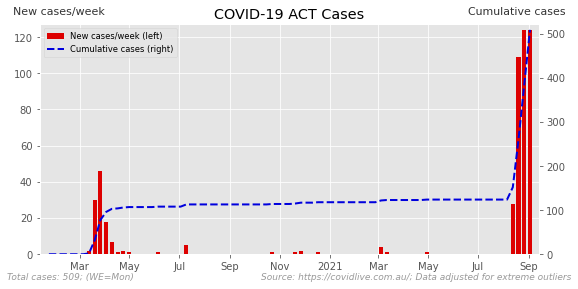

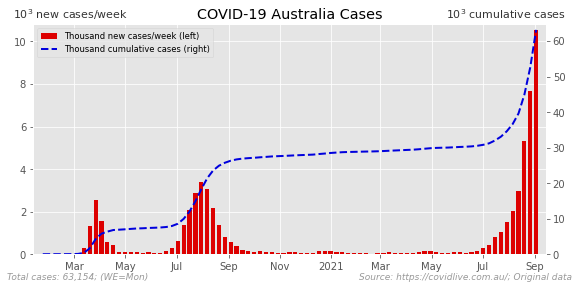

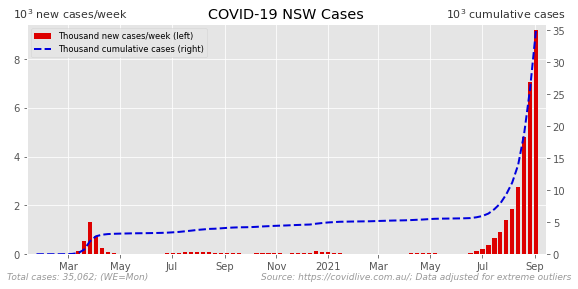

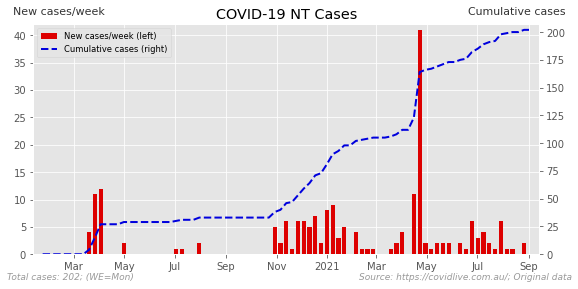

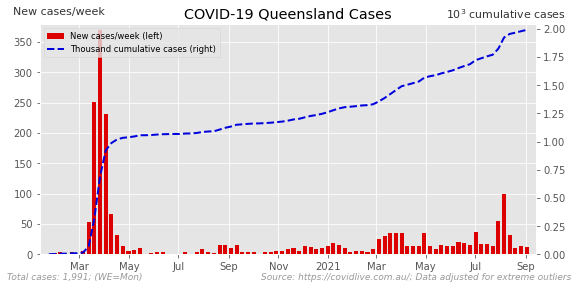

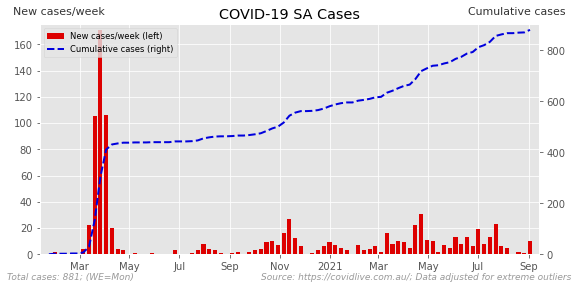

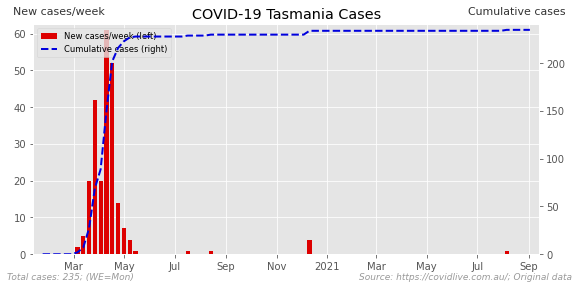

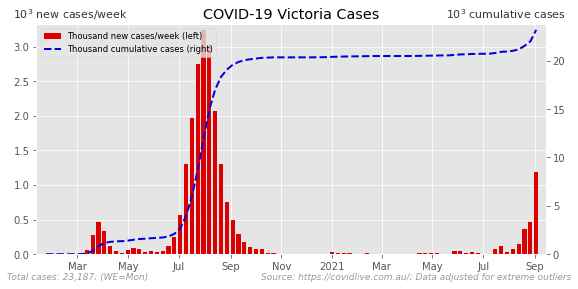

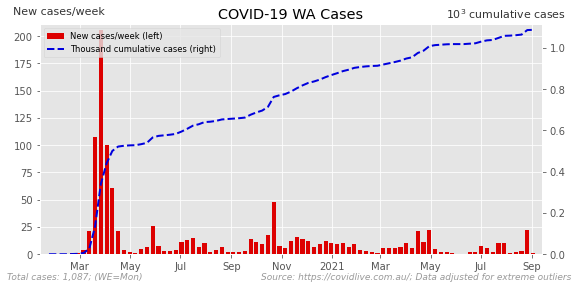

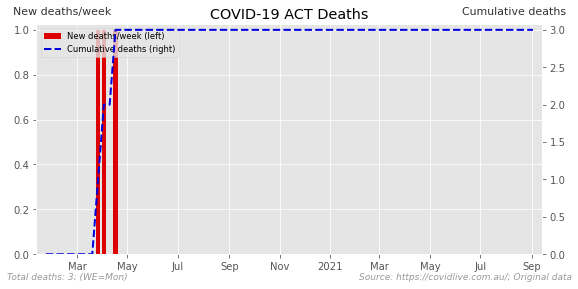

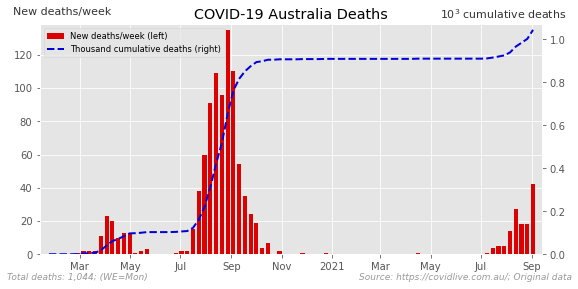

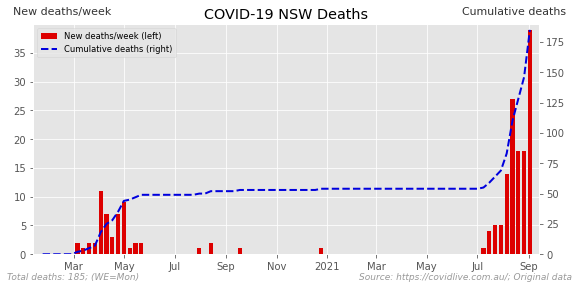

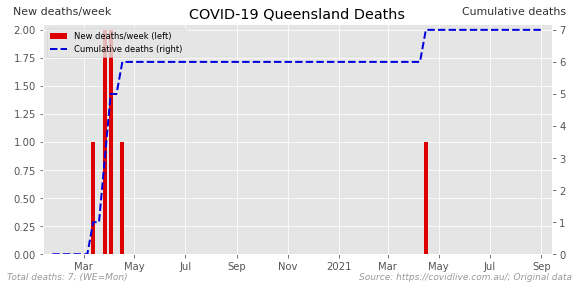

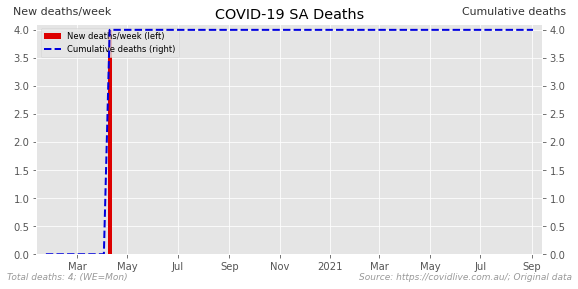

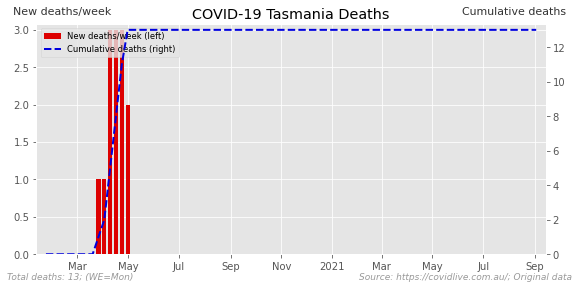

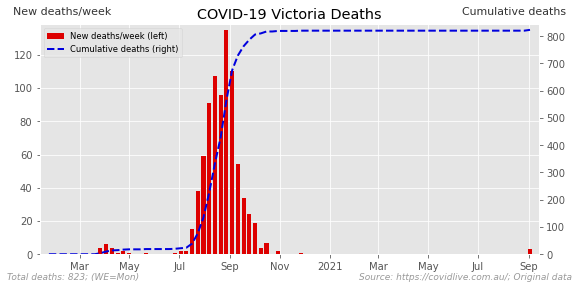

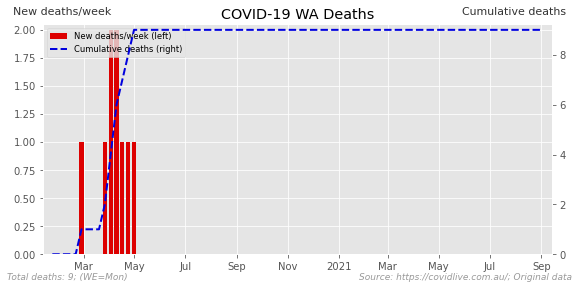

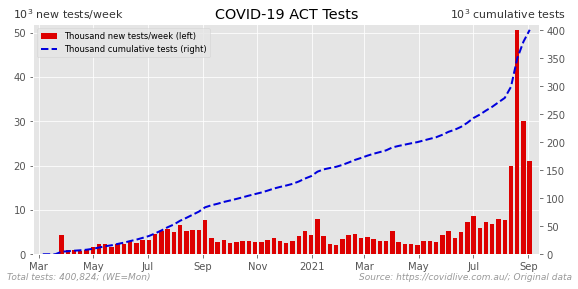

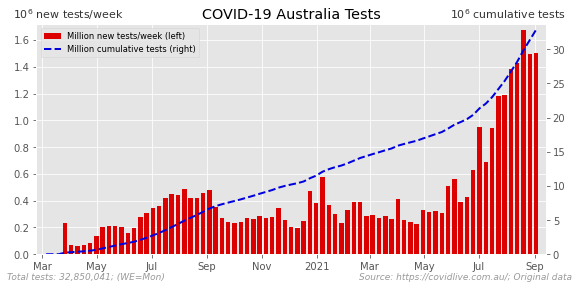

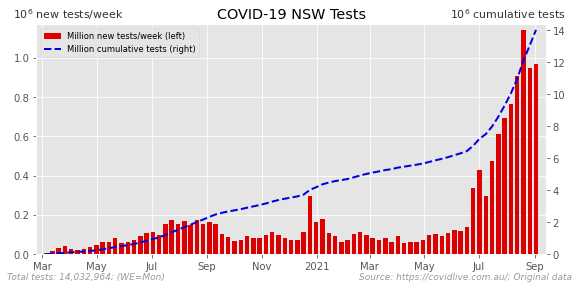

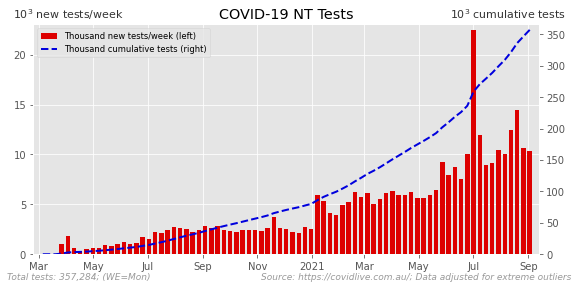

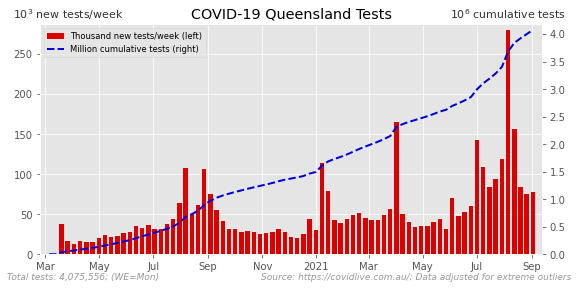

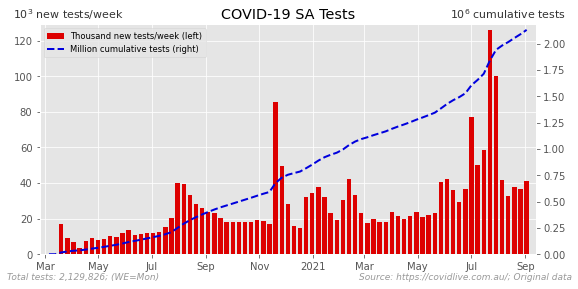

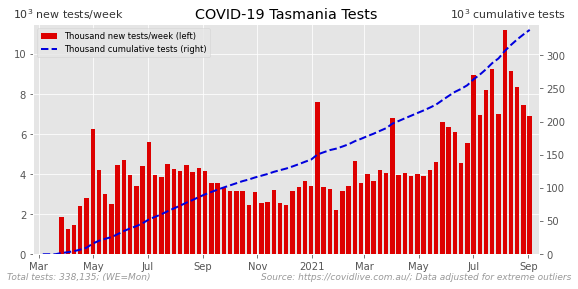

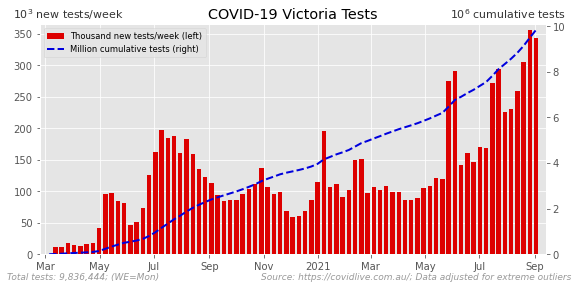

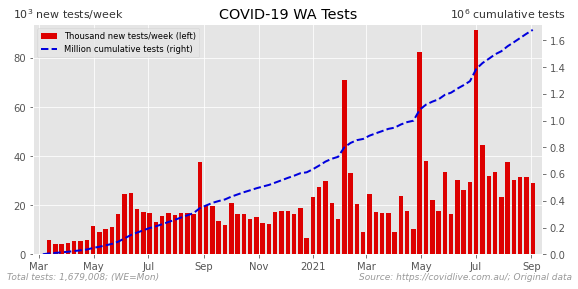

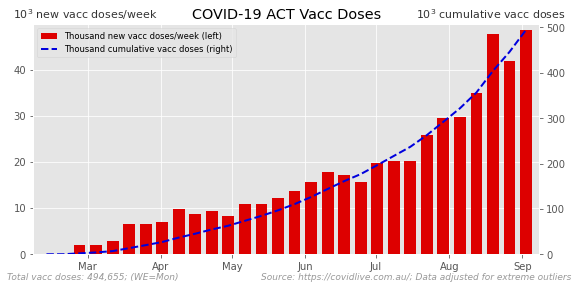

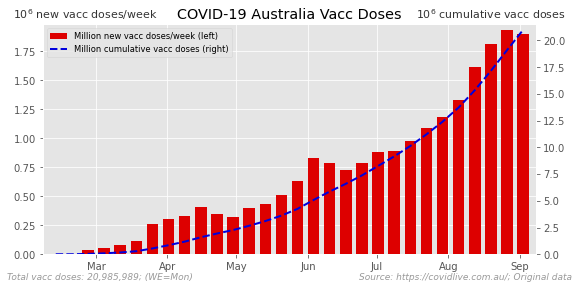

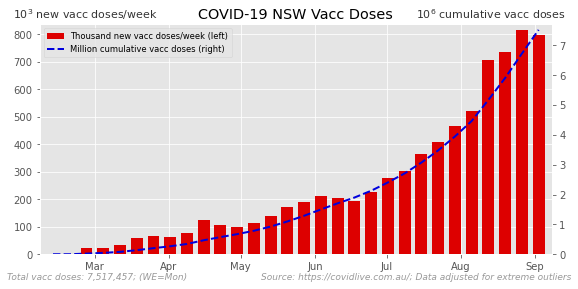

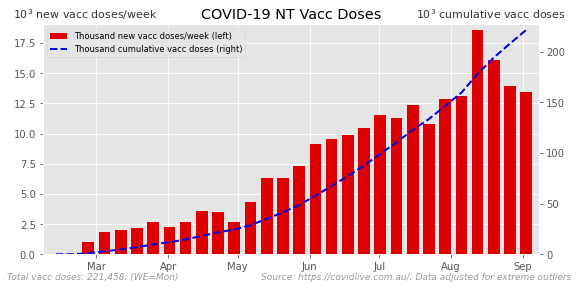

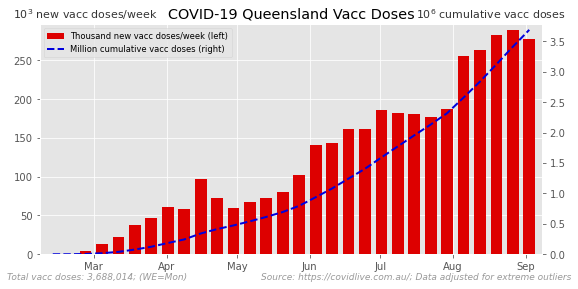

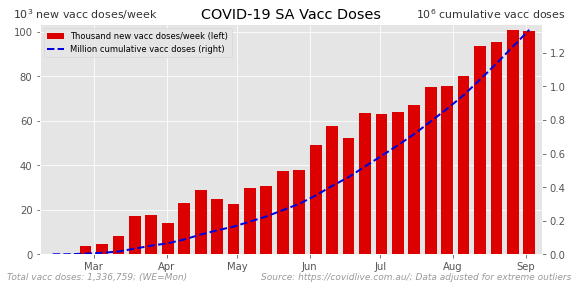

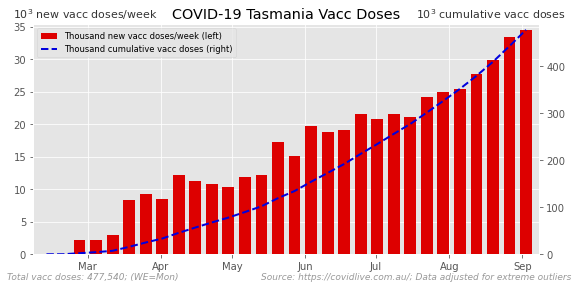

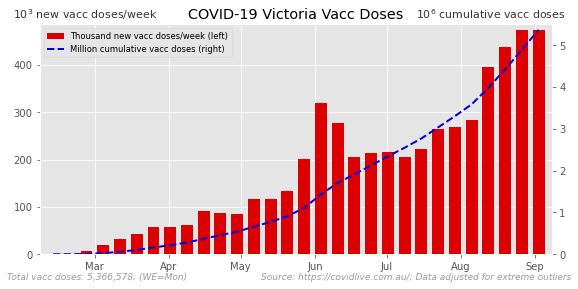

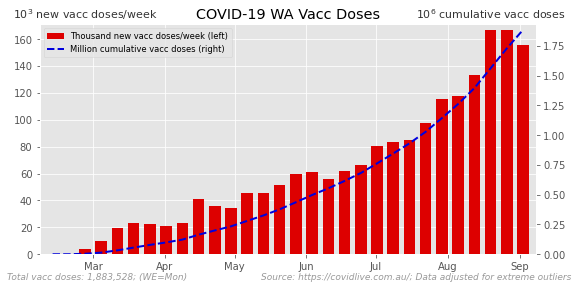

In [17]:
for item, desc in selected_cols.items():
    
    quality = pd.Series(dtype=str)
    for state in daily_u[item].columns:
        if (daily_u[item][state] == daily_c[item][state]).all():
            quality[state] = f'{SOURCE}; Original data'
        else:
            quality[state] = f'{SOURCE}; Data adjusted for extreme outliers'
    
    
    daily = daily_c[item]
    ps.plot_weekly(
                   daily, desc, quality, 
                   chart_directory=CHART_DIRECTORY+'-!weekly-',
                   show=True,
                  )

## Bar Charts

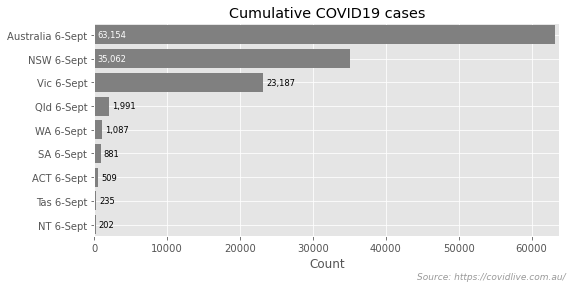

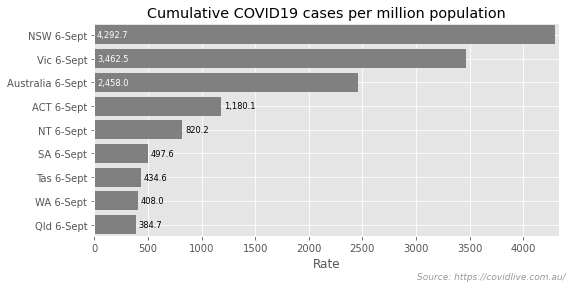

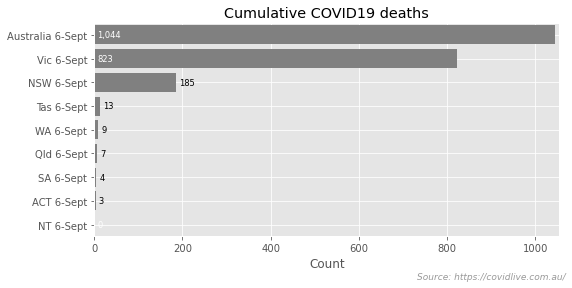

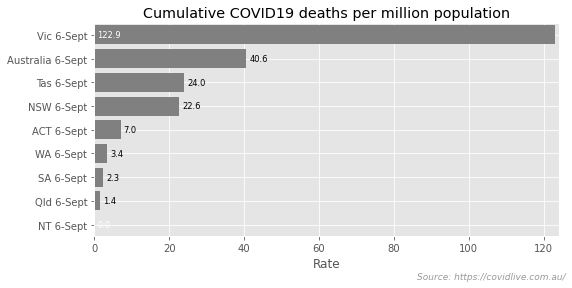

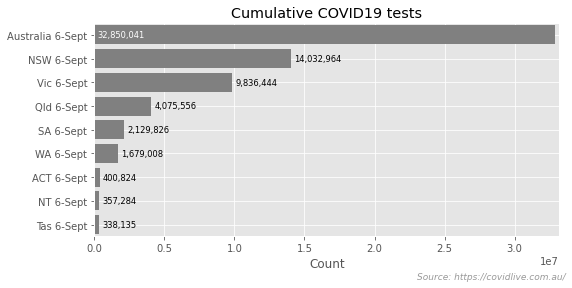

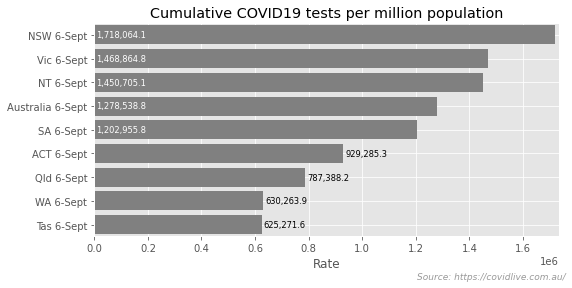

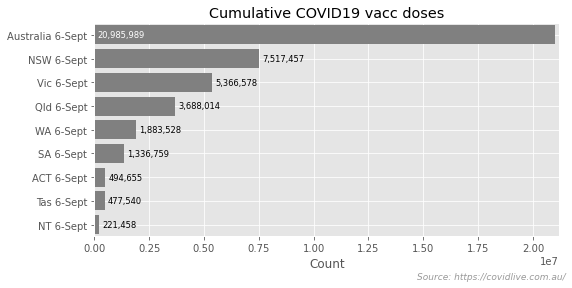

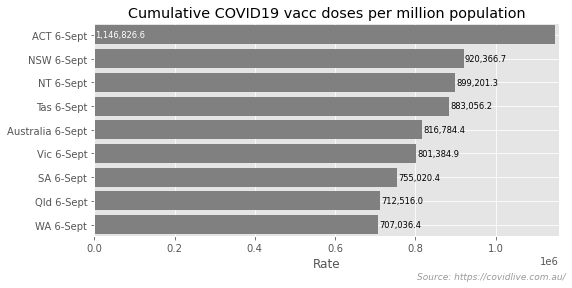

In [18]:
for item, desc in selected_cols.items():
    two_bar_plots(cum_u, item, 'Cumulative', desc)

## Active Cases

In [19]:
# capture active items, with nans where data is not up to date
item = 'ACTIVE_CNT'
active_all = get_item(item, raw_json_data)
active_all.tail()

Lastest value less than its predecessor in ACTIVE_CNT for ACT, WA


NAME           ACT  Australia      NSW   NT  Queensland   SA  Tasmania  \
REPORT_DATE                                                              
2021-09-02   258.0    21476.0  20150.0  2.0        19.0  5.0       0.0   
2021-09-03   255.0    22764.0  21296.0  2.0        18.0  3.0       0.0   
2021-09-04   239.0    24279.0  22705.0  2.0        18.0  5.0       0.0   
2021-09-05   237.0    25588.0  23903.0  2.0        16.0  6.0       0.0   
2021-09-06   222.0    26736.0  24860.0  2.0        20.0  7.0       0.0   

NAME         Victoria    WA  
REPORT_DATE                  
2021-09-02     1029.0  13.0  
2021-09-03     1180.0  10.0  
2021-09-04     1301.0   9.0  
2021-09-05     1417.0   7.0  
2021-09-06     1619.0   6.0

### Bar chart of active cases

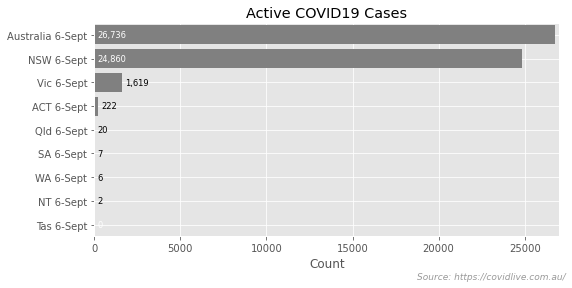

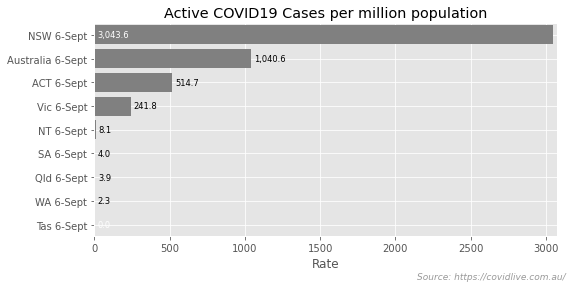

In [20]:
# bar chart of latest active cases, where data is complete
a_dict = {'active': active_all}
two_bar_plots(a_dict, 'active', 'Active', 'Cases')

### Active cases - line plots

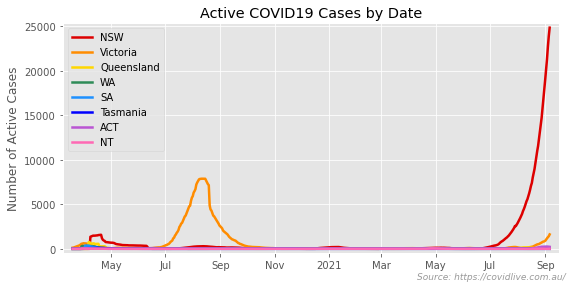

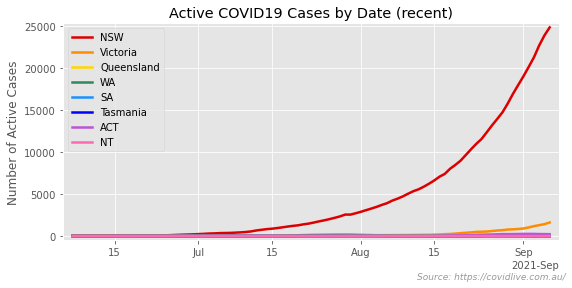

In [21]:
# line plots of trajectories
if 'Australia' in active_all.columns:
    del active_all['Australia']
    
line_plots(active_all, 'Active COVID19 Cases by Date',
           'Number of Active Cases')

## Source of infection

### Extraction

In [22]:
Australia = 'Australia'
names = {
    'SRC_OVERSEAS_CNT':   'Overseas',
    'SRC_INTERSTATE_CNT': 'Interstate',
    'SRC_CONTACT_CNT':    'Known contact',
    'SRC_UNKNOWN_CNT':    'Unknown contact',
    'SRC_INVES_CNT':      'Investigating',
}
# check we have all possible sources ...
assert((raw_json_data.columns.str[:3] == 'SRC').sum() == len(names))

In [23]:
def extract_soi(raw_json_data):

    # construct data for sources of infection
    soi_tables = {}
    for item in names.keys():
        table = get_item(item, raw_json_data)
        if Australia in table.columns: del table[Australia]
        soi_tables[names[item]] = table

    state_soi_tables = {}
    for state in state_pop.keys():
        if state == Australia: continue
        table = pd.DataFrame()
        for item in names.keys():
            table[names[item]] = soi_tables[names[item]][state]
        state_soi_tables[state] = table.dropna()

    soi_national = {}
    for key in soi_tables.keys():
        soi_national[key] = soi_tables[key].sum(axis=1)
    soi_national = pd.DataFrame(soi_national) 
    if soi_national.iloc[-1].sum() < soi_national.iloc[-2].sum():
        # last cumulative row incomplete
        soi_national = soi_national[:-1]

    return soi_tables, state_soi_tables, soi_national

In [24]:
soi_tables, state_soi_tables, soi_national = extract_soi(raw_json_data)

Lastest value less than its predecessor in SRC_UNKNOWN_CNT for Australia, Victoria


### Check latest raw SOI data against raw case count data

In [25]:
# WARN if penultimate and final SOI 
# totals do not match CASE_CNT table

def check_SOI():
    soi_cases = {name: x.sum(axis=1) 
                     for name, x in state_soi_tables.items()}
    soi_cases = pd.DataFrame(soi_cases)
    cases = cum_u['CASE_CNT'][soi_cases.columns] # ensure column order

    for check in (-1, -2):
        case_row = cases.diff().iloc[check]
        soi_row = soi_cases.diff().iloc[check]
        problematic = (
            (case_row != soi_row) 
            & soi_row.notna() 
            & case_row.notna()
        )
        if problematic.any():
            warn(f'CASE_CNT mismatch - check {"second " if check == -2 else ""} '
                 'last line of the SOI tables for '
                 f'{problematic[problematic].index.values}')
            
            print('Latest cases data:')
            display(cases.diff().tail(4))
            print('Latest source of infection data:')
            display(soi_cases.diff().tail(4))

check_SOI()

CASE_CNT mismatch - check  last line of the SOI tables for ['Queensland']
Latest cases data:


NAME            NSW  Victoria  Queensland   SA   WA  Tasmania   NT   ACT
REPORT_DATE                                                             
2021-09-03   1416.0     209.0         0.0  2.0  0.0       0.0  0.0  18.0
2021-09-04   1516.0     189.0         2.0  2.0  0.0       0.0  0.0  32.0
2021-09-05   1459.0     183.0         0.0  1.0  0.0       0.0  0.0  15.0
2021-09-06   1280.0     245.0         7.0  1.0  1.0       0.0  0.0  11.0

Latest source of infection data:


NSW  Victoria  Queensland   SA   WA  Tasmania   NT   ACT
REPORT_DATE                                                             
2021-09-03   1416.0     209.0         0.0  2.0  0.0       0.0  0.0  18.0
2021-09-04   1516.0     189.0         2.0  2.0  0.0       0.0  0.0  32.0
2021-09-05   1459.0     183.0         0.0  1.0  0.0       0.0  0.0  15.0
2021-09-06   1280.0     245.0         5.0  1.0  1.0       0.0  0.0  11.0

### Plot national SOI 

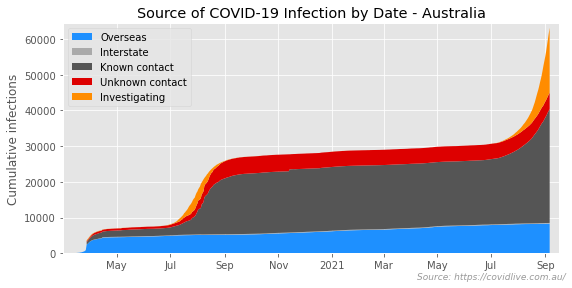

In [26]:
# plot time series of national totals
serious_colours = ['dodgerblue', '#aaaaaa', '#555555', '#dd0000', 'darkorange',]
assert(len(serious_colours) == len(names)) # check we have the right number of colours
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=serious_colours)

labels = list(names.values())
args = [soi_national[name] for name in labels]
fig, ax = plt.subplots()
ax.stackplot(soi_national.index, *args, labels=labels)
ax.legend(loc='upper left')

title = 'Source of COVID-19 Infection by Date - Australia'
ps.finalise_plot(ax, 
                 title=title, 
                 xlabel=None, 
                 ylabel='Cumulative infections',
                 **std_plot_settings,
                )

In [27]:
# extract the latest data, and under investigation
latest = pd.DataFrame()

for state in state_soi_tables.keys():
    latest[state] = state_soi_tables[state].iloc[-1]


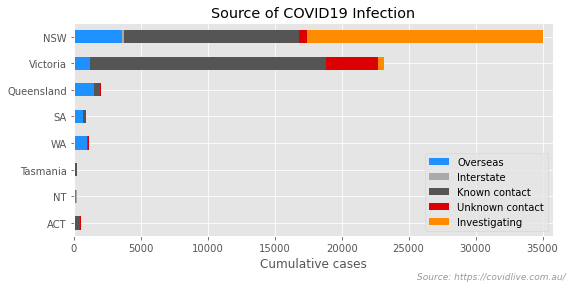

In [28]:
# plot the latest data
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=serious_colours)
ax = latest.T[::-1].plot.barh(stacked=True)
title = 'Source of COVID19 Infection'
ps.finalise_plot(ax, 
                 title=title, 
                 xlabel='Cumulative cases', 
                 ylabel=None,
                 **std_plot_settings,
                )

### Plot cases under investigation by state

In [29]:
under_investigation = soi_tables['Investigating']

# These are running totals (and will go up and down)
under_investigation.tail()

NAME          ACT      NSW   NT  Queensland   SA  Tasmania  Victoria   WA
REPORT_DATE                                                              
2021-09-02   12.0  13432.0  0.0         0.0  0.0       0.0     208.0  0.0
2021-09-03   17.0  14453.0  0.0         0.0  0.0       0.0     297.0  0.0
2021-09-04    8.0  15582.0  0.0         0.0  0.0       0.0     357.0  0.0
2021-09-05    2.0  16739.0  0.0         0.0  0.0       0.0     395.0  0.0
2021-09-06    2.0  17670.0  0.0         0.0  0.0       0.0     492.0  0.0

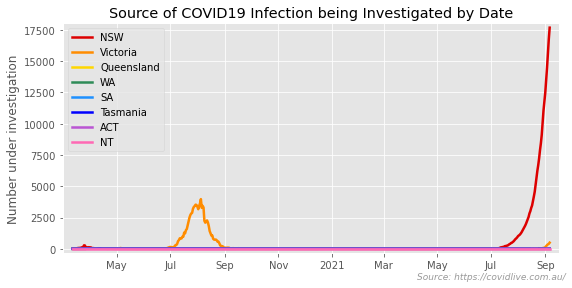

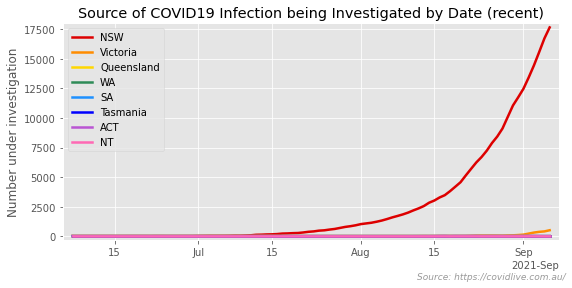

In [30]:
line_plots(under_investigation, 
           'Source of COVID19 Infection being Investigated by Date',
           'Number under investigation',
          )

## Local cases/transmission

### Create dataframe of local transmission

In [31]:
# calculate raw data from from Sourse of Infection data collected above
local_trans = list(names.values()) # names dictionary defined above
local_trans.remove('Overseas')

def get_local_trans():
    local_trans_d = {}
    for state in state_soi_tables.keys():
        local_trans_d[state] = state_soi_tables[state][local_trans].sum(axis=1)
    local_trans_df = pd.DataFrame(local_trans_d)
    return local_trans_df

In [32]:
local_trans_df = get_local_trans()
local_nan_map = local_trans_df.isna()

# check raw data - most recent cumulative totals
local_trans_df.tail(5)

NSW  Victoria  Queensland     SA     WA  Tasmania    NT  \
REPORT_DATE                                                                
2021-09-02   25777.0   21141.0       524.0  217.0  115.0     150.0  15.0   
2021-09-03   27192.0   21349.0       524.0  217.0  115.0     150.0  15.0   
2021-09-04   28707.0   21538.0       525.0  217.0  115.0     150.0  15.0   
2021-09-05   30164.0   21721.0       525.0  217.0  115.0     150.0  15.0   
2021-09-06   31443.0   21963.0       525.0  217.0  115.0     150.0  15.0   

               ACT  
REPORT_DATE         
2021-09-02   338.0  
2021-09-03   356.0  
2021-09-04   388.0  
2021-09-05   403.0  
2021-09-06   414.0

In [33]:
# check raw data - most recent daily new cases
local_trans_df.diff().tail()

NSW  Victoria  Queensland   SA   WA  Tasmania   NT   ACT
REPORT_DATE                                                             
2021-09-02   1280.0     174.0         1.0  2.0  0.0       0.0  0.0  12.0
2021-09-03   1415.0     208.0         0.0  0.0  0.0       0.0  0.0  18.0
2021-09-04   1515.0     189.0         1.0  0.0  0.0       0.0  0.0  32.0
2021-09-05   1457.0     183.0         0.0  0.0  0.0       0.0  0.0  15.0
2021-09-06   1279.0     242.0         0.0  0.0  0.0       0.0  0.0  11.0

In [34]:
# make the usual adjustments
LOCAL = 'LOCAL_TRANS'

# the next step assumes the data for today is fully updated.
# but if not, we roll forward yesterday's numbers so that
# the cumulative bar charts (below) are complete.
cum_u[LOCAL] = (
    local_trans_df
    .sort_index(ascending=True)
)

daily_u[LOCAL], daily_c[LOCAL], cum_c[LOCAL] = (
    ps.dataframe_correction(cum_u[LOCAL], verbose=False)
)

In [35]:
# What does the most recent data look like when adjusted ...
daily_c[LOCAL].iloc[-5:]

NSW  Victoria  Queensland   SA   WA  Tasmania   NT   ACT
REPORT_DATE                                                             
2021-09-02   1280.0     174.0         1.0  2.0  0.0       0.0  0.0  12.0
2021-09-03   1415.0     208.0         0.0  0.0  0.0       0.0  0.0  18.0
2021-09-04   1515.0     189.0         1.0  0.0  0.0       0.0  0.0  32.0
2021-09-05   1457.0     183.0         0.0  0.0  0.0       0.0  0.0  15.0
2021-09-06   1279.0     242.0         0.0  0.0  0.0       0.0  0.0  11.0

### Bar charts cumulative local transmission

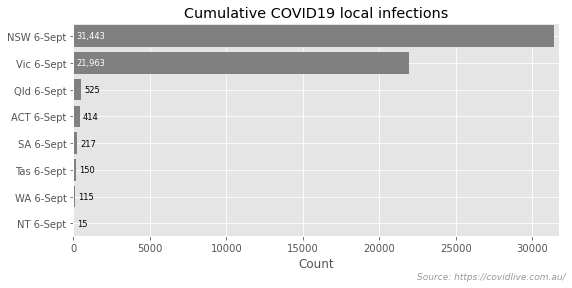

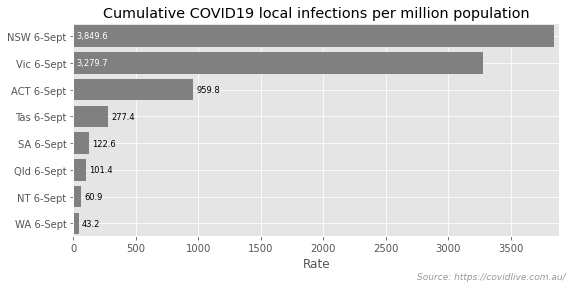

In [36]:
two_bar_plots(cum_u, LOCAL, 'Cumulative', 'local infections')

### Weekly charts for local transmission

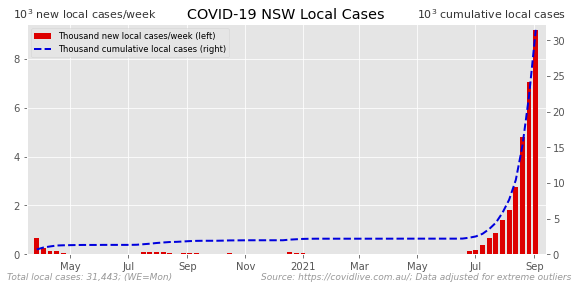

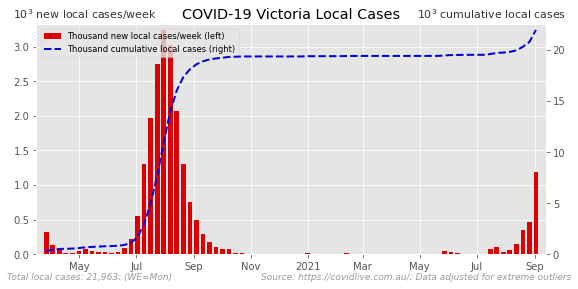

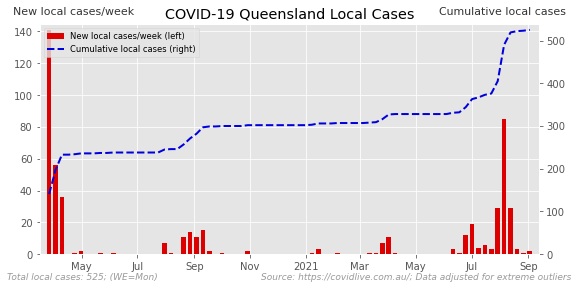

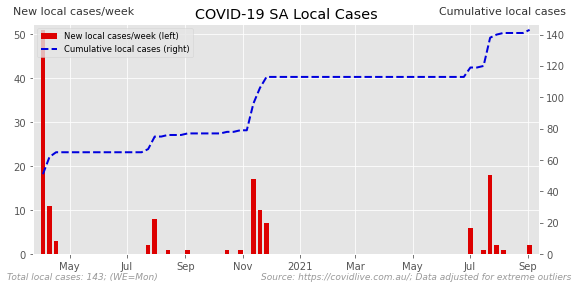

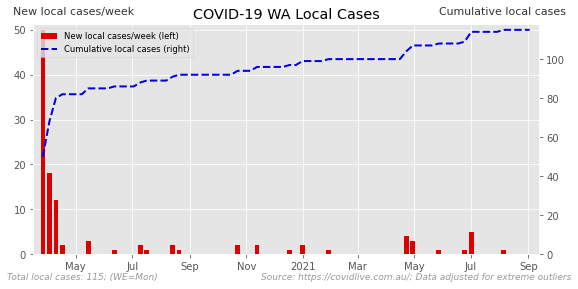

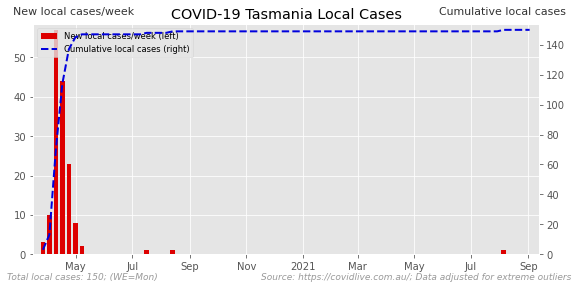

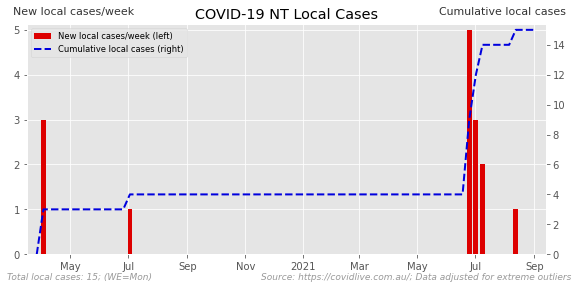

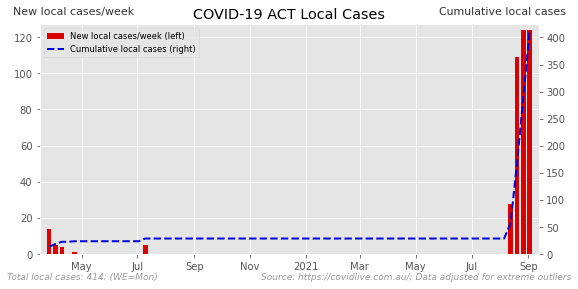

In [37]:
quality = pd.Series(dtype=str)
for state in daily_u[LOCAL].columns:
    if (daily_u[LOCAL][state] == daily_c[LOCAL][state]).all():
        quality[state] = f'{SOURCE}; Original data'
    else:
        quality[state] = f'{SOURCE}; Data adjusted for extreme outliers'

desc = 'local cases'
ps.plot_weekly(
    daily_c[LOCAL], desc, quality, 
    chart_directory=f'{CHART_DIRECTORY}-!{desc}-',
    show=True,
)

### Recent local transmission daily charts

In [38]:
local_lfooter = f'Local = {" + ".join(local_trans)}'

def recent_bar_with_ma_plot(df, mode):
    """plotting function - bar charts for daily local transmission,
       with 7 and 14 day moving averages."""
    
    # establish moving average periods
    MA1 = 7 # days
    MA2 = 14 # dats
    
    for col in df.columns:
        series = df[col]
        
        # bail if nothing to plot
        if series[-RECENT:].sum() <= 0: 
            continue
            
        # get plotables for recent period
        ma1 = series.rolling(MA1).mean()[-RECENT:]
        ma2 = series.rolling(MA2).mean()[-RECENT:]
        series = series[-RECENT:]
        
        # plot
        fig, ax = plt.subplots()
        ax.xaxis_date()
        ax.bar(series.index, series, label=mode, 
               color='#dd0000')
        ax.plot(ma1.index, ma1, label=f'{MA1} day ave.', 
                color='darkorange', lw=2.5)
        ax.plot(ma2.index, ma2, label=f'{MA2} day ave.', 
                color='cornflowerblue', lw=2.5)
        
        # annotate / finalise plot
        ax.legend(loc='best')
        title = (f'New Locally Acquired COVID19 {mode.title()} '
                 f'in {col} - Recent')
        ax.figure.text(x=0.01, y=0.99, 
                       s=f'Period total: {series.sum():,.0f}',
                       ha='left', va='top',
                       fontsize=9, fontstyle='italic',
                       color='#999999')
        ps.finalise_plot(ax, 
                         title=title, 
                         xlabel=None,
                         ylabel=f'Daily New {mode.title()}',
                         lfooter=local_lfooter,
                         **std_plot_settings,
                        )

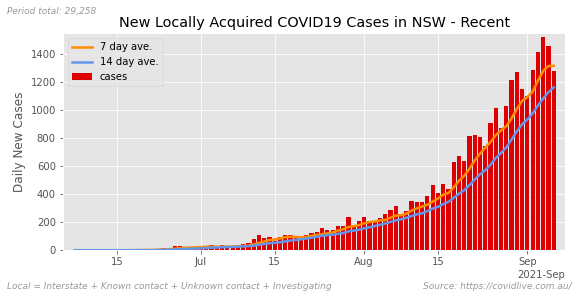

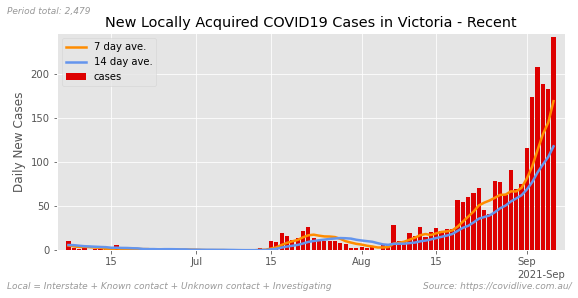

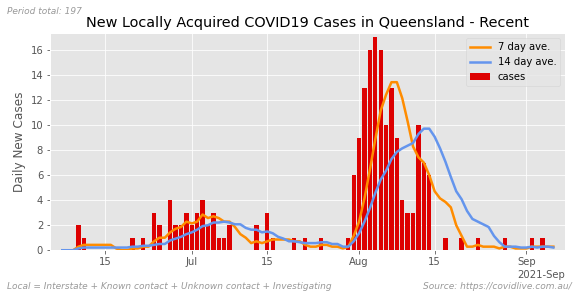

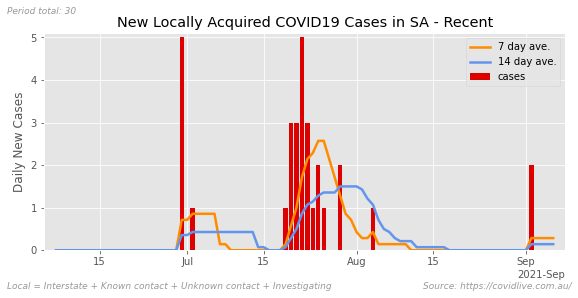

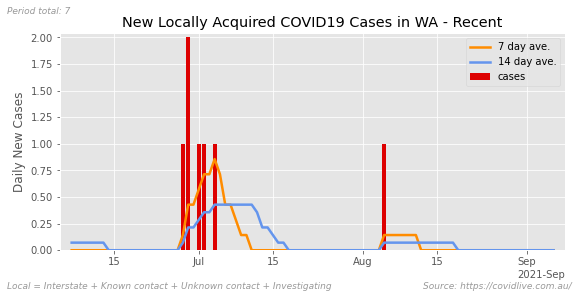

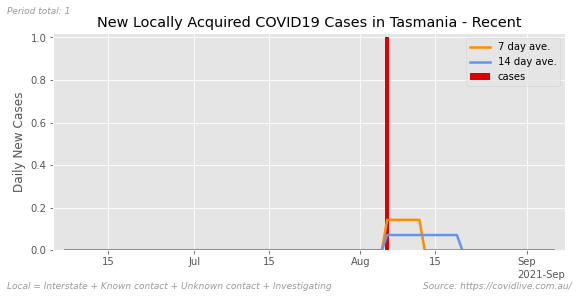

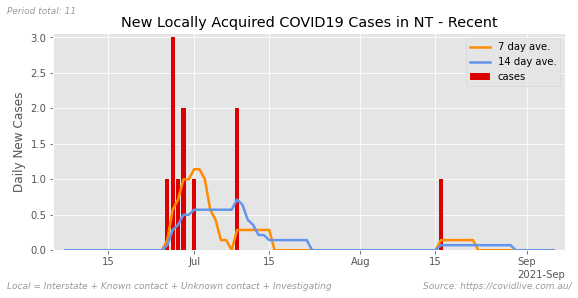

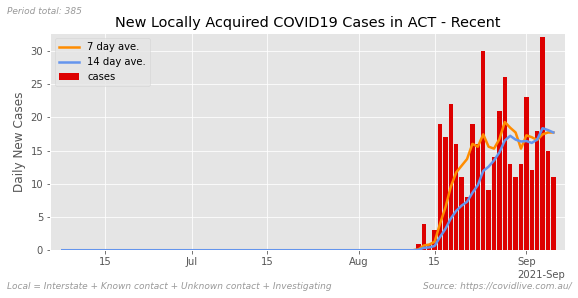

In [39]:
# and plot it
recent_bar_with_ma_plot(daily_c[LOCAL], "cases")

## Local outbreaks

Note: requires the SOI data for today to be updated.

### Supporting functions

In [40]:
def get_local_daily(state, start=None, stop=None):
    """Get local series for state. If specified, 
       limite the length of the series selected."""
    
    series = daily_c[LOCAL][state].dropna()
    
    if start:
        series = series[series.index >= pd.Timestamp(start)]

    if stop:
        if type(stop) == int:
            series = series.iloc[:stop]
        if type(stop) == str:
            series = series[series.index <= pd.Timestamp(stop)]

    return series

### Named outbreaks

In [41]:
# outbreaks:
# focusing on those after April 2020, 
# that last more than 21 days, 
# that have more than 100 cases in total,
# starting from the last zero-new-cases day of the outbreak

NSW_2020_Crossroads = {
    'NSW 08-Jul-20 (Crossroads)':   ['NSW',        '2020-07-08', 120],
}

NSW_2020_Avalon = {
    'NSW 16-Dec-20 (Avalon)':       ['NSW',        '2020-12-16', 120],
}

NSW_2021_Bondi = {
    'NSW 16-Jun-21 (Delta)':        ['NSW',        '2021-06-16',  None, ],
}

Vic_2020_wave2 = {
    'Vic 09-Jun-20 (2nd Wave)':     ['Victoria',   '2020-06-09',    100],
}

Vic_2021_Wollert = {
    'Vic 24-May-21 (Wollert)':      ['Victoria',   '2021-05-24', 36],
}

Vic_2021_Delta = {
    'Vic 04-Aug-21 (Delta)':        ['Victoria',   '2021-08-04',  None, ],    
}

Qld_2021_Delta = {
    'Qld 29-Jul-21 (Delta)':        ['Queensland', '2021-07-29',  40, ],     
}

ACT_2021_Delta = {
    'ACT 11-Aug-21 (Delta)':           ['ACT',        '2021-08-11',  None, ], 
}

older = {
    'Qld Jun-21':  ['Queensland', '2021-06-19',  40, ],
    'NT Jun-21':   ['NT',         '2021-06-25',  40, ],
    'WA Jun-21':   ['WA',         '2021-06-27',  40, ],  
    'SA Jun-21':   ["SA",         '2021-06-29',  16, ],
}

Older_outbreaks = {
    **NSW_2020_Crossroads,
    **NSW_2020_Avalon,
    **NSW_2021_Bondi,
    **Vic_2020_wave2,
    **Vic_2021_Wollert,
    **Vic_2021_Delta,
    **Qld_2021_Delta,
    **ACT_2021_Delta,
}

Current_outbreaks = {
    **NSW_2021_Bondi,
    **Vic_2021_Delta,
    **ACT_2021_Delta,
}

Vic_2020_vs_Delta = {
    **Vic_2020_wave2,
    **Current_outbreaks,
}

In [42]:
def plot_outbreaks(outbreaks, colours, span_days=100, **kwargs):

    serieses = {}
    tag = []
    for label, (state, start_date, reduced_span) in outbreaks.items():
        tag.append(state)
        span = reduced_span if reduced_span and reduced_span < span_days else span_days
        serieses[label] = get_local_daily(state, start=start_date, stop=span).reset_index(drop=True)
    outbreak_df = pd.DataFrame(serieses)

    # check day zero is zero, and day one is more than zero
    print(f'Checking: \n{outbreak_df.iloc[0:3]}')
    assert( (outbreak_df.iloc[0] == 0).all() )
    assert( (outbreak_df.iloc[1] > 0).all() )
    
    datasets = [outbreak_df, outbreak_df.cumsum()]
    ylabels =  ['New cases on day', 'Cumulative new cases']
    for ylabel, data in zip(ylabels, datasets):
        ax = data.plot(color=colours, lw=2.5)
        
        # add Henderson moving averages if we have enough data
        MA_TERM = 13 # must be odd
        if ylabel == ylabels[0] and len(data) >= MA_TERM:
            hma = pd.DataFrame()
            for col in data.columns:
                input_ = data[col].dropna()
                if len(input_) >= MA_TERM:
                    hma[col] = Henderson.Henderson(input_, MA_TERM)
            if not hma.empty:
                hma.columns = hma.columns + ' moving ave.'
                hma.plot(color=colours, lw=1, ls='-.', ax=ax, label=None)
            ax.legend(ncol=1, prop={'size': 8})

        # and finalise the plot
        if "title" not in kwargs:
            kwargs["title"] = 'Local Outbreak' + ('s' if len(data.columns) > 1 else '')
            kwargs["title"] = kwargs["title"] + ': ' + ", ".join(data.columns)
            if len(kwargs["title"]) > 60:
                kwargs["title"] = 'Local Outbreaks'
            
        ps.finalise_plot(ax,
            ylabel=ylabel,
            xlabel=f'Day of the outbreak',
            save_tag=f'-{ylabel.split()[0]}-{"-".join(tag)}',
            lfooter='Day zero is the last zero new cases day before new cases.',
            **kwargs, 
            **std_plot_settings,
        )



Checking: 
   NSW 16-Jun-21 (Delta)  Vic 04-Aug-21 (Delta)  ACT 11-Aug-21 (Delta)
0                    0.0                    0.0                    0.0
1                    2.0                    7.0                    1.0
2                    2.0                    6.0                    4.0


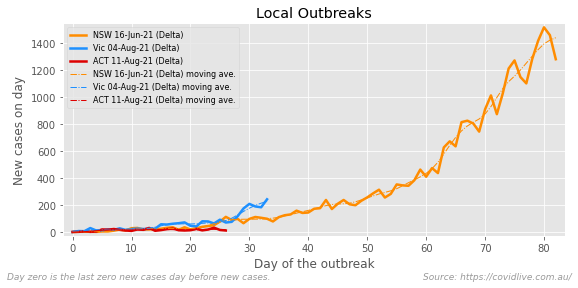

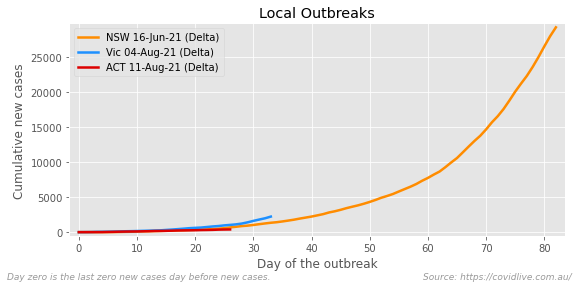

Checking: 
   Vic 09-Jun-20 (2nd Wave)  NSW 16-Jun-21 (Delta)  Vic 04-Aug-21 (Delta)  \
0                       0.0                    0.0                    0.0   
1                       4.0                    2.0                    7.0   
2                       8.0                    2.0                    6.0   

   ACT 11-Aug-21 (Delta)  
0                    0.0  
1                    1.0  
2                    4.0  


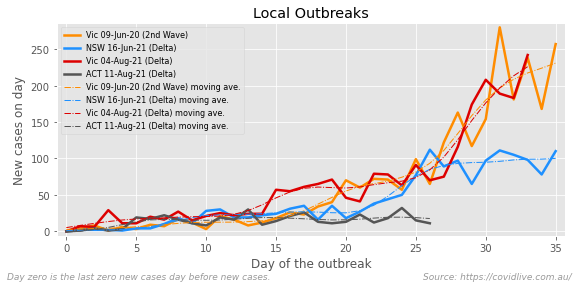

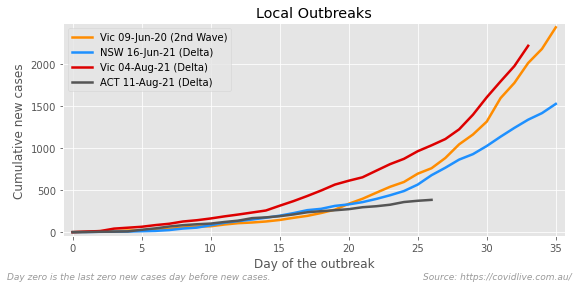

In [43]:
colours = ['darkorange', 'dodgerblue', '#dd0000', '#555555', 
           'royalblue', 'orchid', 'darkred']
plot_outbreaks(Current_outbreaks, colours)
plot_outbreaks(Vic_2020_vs_Delta, colours, span_days=36)

### Outbreaks on a log scale

Note, our regression model is
$$
\begin{align*}
ln(y) & = b + kt\\
y & = e^{(b + kt)}\\
y & = e^b*e^{kt}\\
y & = ae^{kt}\\
\end{align*}
$$
The doubling time ...
$$
\begin{align*}
2a & = ae^{kt}\\
2 & = e^{kt}\\
ln(2) & = kt\\
t & = \frac{ln(2)}{k}\\
\end{align*}
$$

In [44]:
import statsmodels.api as sm
def get_exp_regression(series):
    """Get a predicted regression line and formula for plotting
       a line through exponential data
       Returns None if input data is problematic"""
    
    # sanity checks
    if (probs := (series <= 0) | series.isna()).any(): 
        probs = probs[probs].index.strftime("%Y-%m-%d")
        warn(f'Cannot do log regression for {name} as '
             f'there is bad data for dates: {probs}')
        return None 
    
    # index to an integer series starting at t=0
    log_series = np.log(series).reset_index(drop=True)
    
    # Stats model
    x = sm.add_constant(log_series.index.values, prepend=False)
    log_y = log_series.values
    model = sm.OLS(log_y, x)
    results = model.fit()
    #print(results.summary())
    y_predicted = np.exp(results.predict(x)) # in-sample prediction
    m, b = results.params
    a = np.exp(b)
    formula = f'$y={a:,.1f}e^' '{' f'{m:,.4f}t' '}$'
    
    return pd.Series(y_predicted, index=series.index), formula, m, a

In [45]:
def log_regression_plot(name, state, start, stop, 
                        tail=0.75, final_oos=0, forward=0):
    """plot an exponential regression line through the tail (fraction)
       of the data using with both a linear and log y-axis. 
       An out-of-sample projection plot can be provided for the very final 
       set of data points (number) if needed, useful for checking if trend 
       is bending away from exponential *OR* a forward projection can be made
       on the linear plot (only)."""

    # sanity checks
    if final_oos < 0 or final_oos == 1: return None
    if forward < 0 or forward == 1: return None
    
    # get data points
    data = get_local_daily(state, start, stop).iloc[1:] # ignore initial zero day
    print(f'Outbreak period {name}: {len(data)} days')
    
    # regression line through last portion of the data
    final_data = int(len(data) * tail)
    final_data = data.iloc[-final_data:-final_oos] if final_oos > 0 else data.iloc[-final_data:]
    result = get_exp_regression(final_data)
    if result is None: return None
    y_pred, formula, m, a = result
    if len(y_pred) < 2: return None

    # plot log scale and linear scale charts
    for approach in 'log', 'linear':
        title = f'Daily New Cases {name}'
        ylabel = 'Daily new cases'
        fig, ax = plt.subplots()
        ax.scatter(data.index, data, label='Daily new cases')
        ax.plot(y_pred.index, y_pred, 
            lw=2.5, 
            label=formula,
            color='dodgerblue',)
    
        # log or linear scale ...
        if approach == 'log':
            ax.set_yscale('log')
            title += ', log scale'
            ylabel += ' (log scale)'

        # out of sample projection
        if final_oos > 0 and forward == 0:
            t = range(len(y_pred), len(y_pred)+final_oos)
            out_of_sample = a * np.exp(m * t)
            #print(f'Out-ofsample: \n{out_of_sample}')
            unders = data[-final_oos:] - out_of_sample
            print('OOS data under or over projection:\n', unders)
            ax.plot(data.index[-final_oos:], out_of_sample,
               lw=2.5,
               label='Out of sample projection',
               ls=':',
               color='darkblue',)
            title += f', OOS={final_oos}-days'
            
        # forward projection
        if approach == 'linear' and forward > 0 and final_oos == 0:
            t = range(len(y_pred), len(y_pred)+forward)
            projection = a * np.exp(m * t)
            dates = [y_pred.index[0] + pd.Timedelta(days=x) for x in t]
            #print(f'Projection: \n{projection}')
            #print(f'Tally: {data.sum() + projection.sum()}')
            ax.plot(dates, projection,
               lw=2.5,
               label=f'{forward}-day projection',
               ls=':',
               color='darkblue',)
            title += f', FP={forward}-days'

        # finalise plot
        legend = ax.legend(loc='best')
        ps.finalise_plot(
            ax,
            title=title,
            ylabel=ylabel,
            xlabel=None,
            save_tag=f'-{approach}-{tail:.02f}',
            lfooter=f'Line of best fit through final {100*tail:.0f}% of data points: '
                    f'Implied doubling time: {np.log(2)/m:.2f} days.',
            **std_plot_settings,
        )

NSW 16-Jun-21 (Delta)
Outbreak period NSW 16-Jun-21 (Delta): 82 days


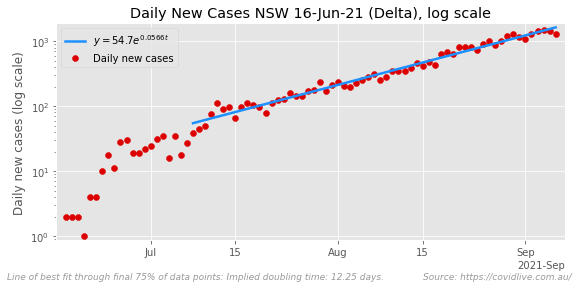

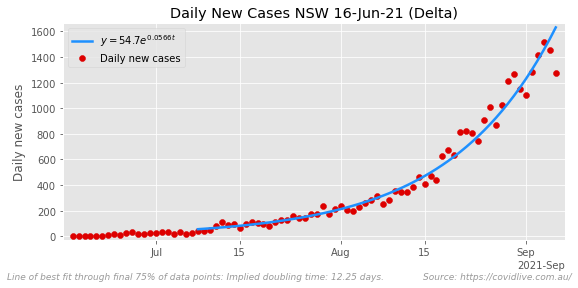

Outbreak period NSW 16-Jun-21 (Delta): 82 days


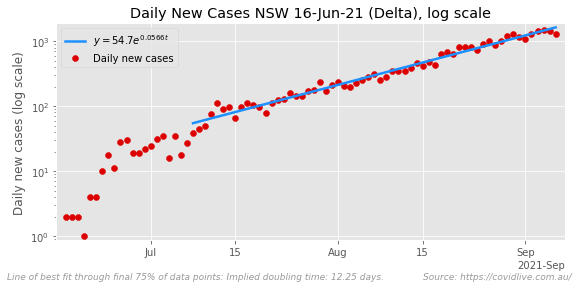

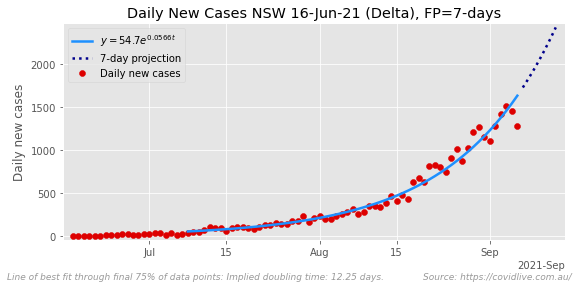

Outbreak period NSW 16-Jun-21 (Delta): 82 days
OOS data under or over projection:
 REPORT_DATE
2021-08-31    -52.850290
2021-09-01   -170.865276
2021-09-02    -66.083392
2021-09-03    -10.753409
2021-09-04      4.861182
2021-09-05   -142.518708
2021-09-06   -415.188684
Name: NSW, dtype: float64


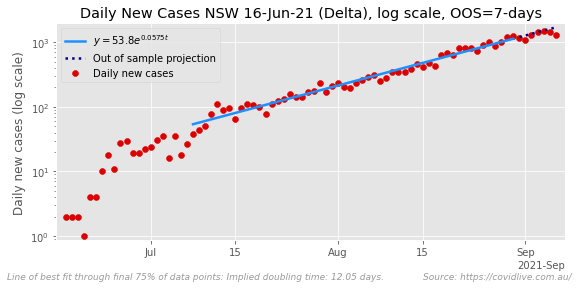

OOS data under or over projection:
 REPORT_DATE
2021-08-31    -52.850290
2021-09-01   -170.865276
2021-09-02    -66.083392
2021-09-03    -10.753409
2021-09-04      4.861182
2021-09-05   -142.518708
2021-09-06   -415.188684
Name: NSW, dtype: float64


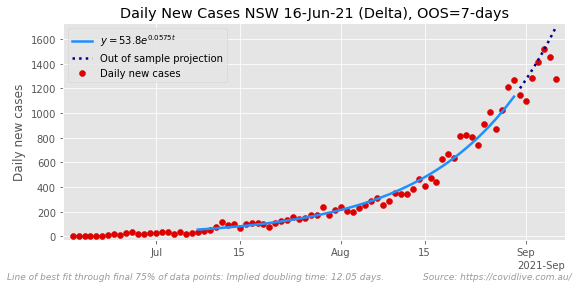

Outbreak period NSW 16-Jun-21 (Delta): 27 days


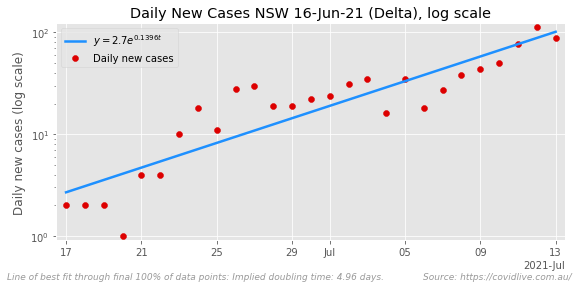

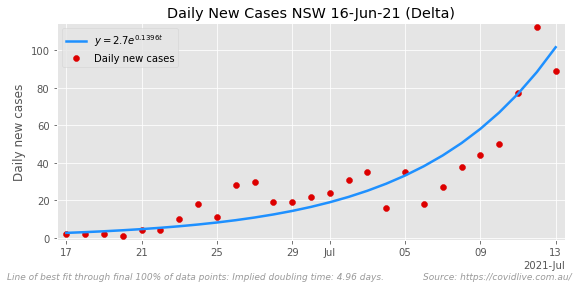

Vic 04-Aug-21 (Delta)
Outbreak period Vic 04-Aug-21 (Delta): 33 days


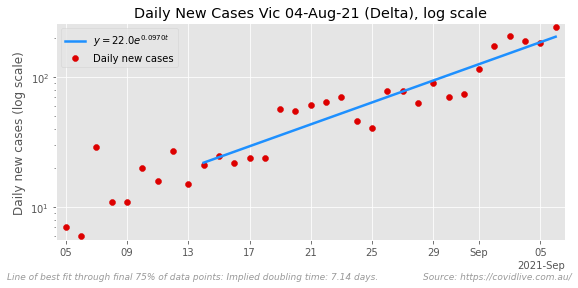

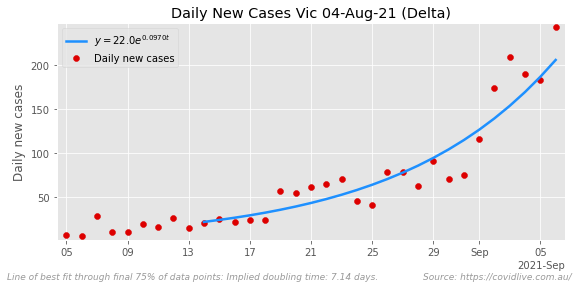

Outbreak period Vic 04-Aug-21 (Delta): 33 days


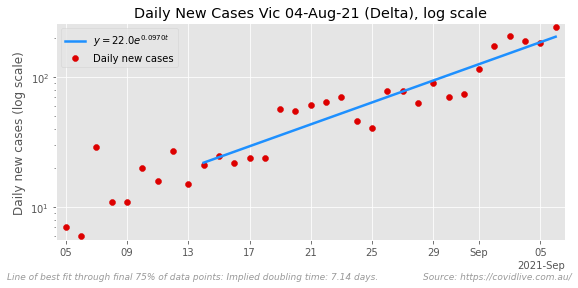

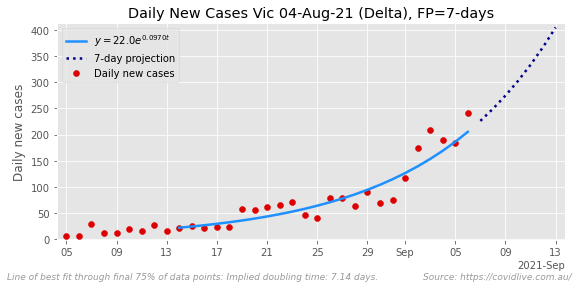

Outbreak period Vic 04-Aug-21 (Delta): 33 days
OOS data under or over projection:
 REPORT_DATE
2021-08-31   -25.659441
2021-09-01     6.471289
2021-09-02    54.820533
2021-09-03    78.319432
2021-09-04    47.893063
2021-09-05    29.459897
2021-09-06    74.931224
Name: Victoria, dtype: float64


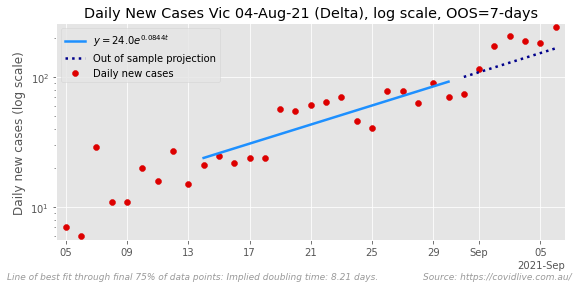

OOS data under or over projection:
 REPORT_DATE
2021-08-31   -25.659441
2021-09-01     6.471289
2021-09-02    54.820533
2021-09-03    78.319432
2021-09-04    47.893063
2021-09-05    29.459897
2021-09-06    74.931224
Name: Victoria, dtype: float64


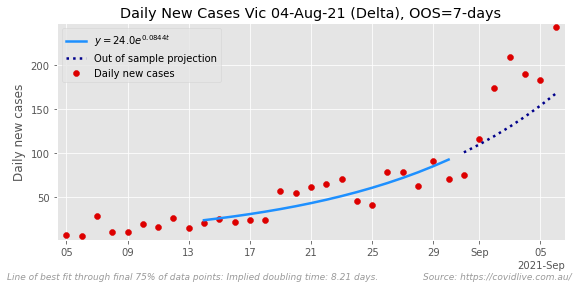

Outbreak period Vic 04-Aug-21 (Delta): 27 days


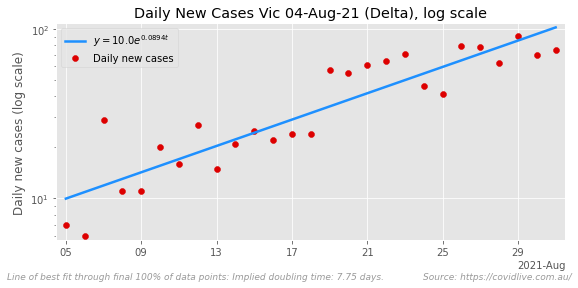

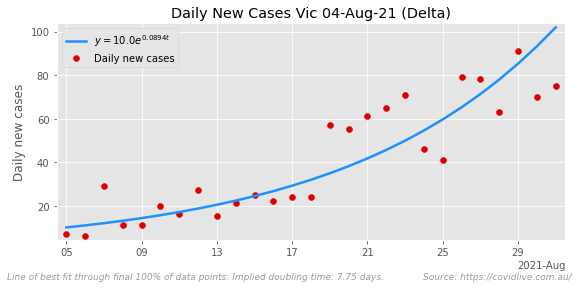

ACT 11-Aug-21 (Delta)
Outbreak period ACT 11-Aug-21 (Delta): 26 days


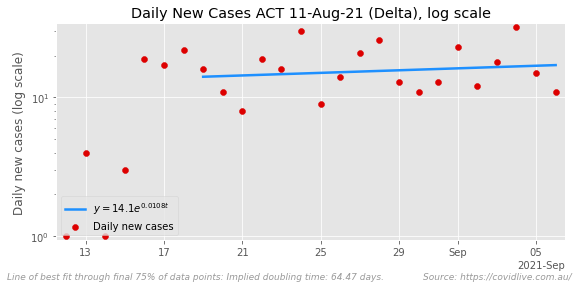

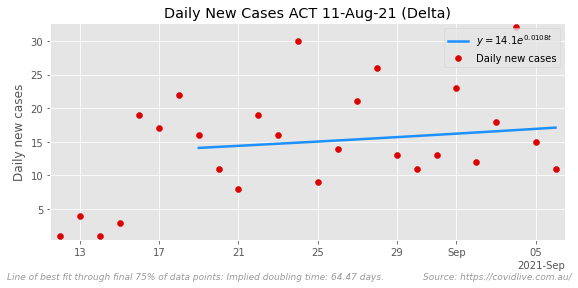

Outbreak period ACT 11-Aug-21 (Delta): 26 days


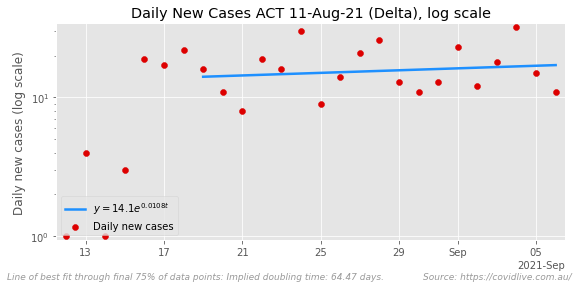

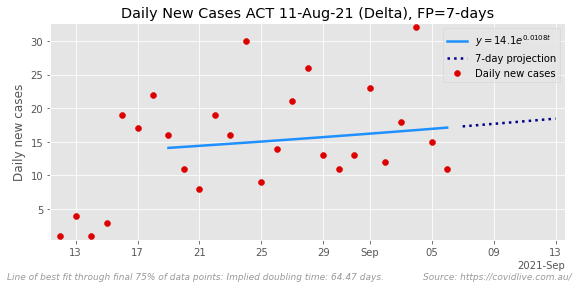

Outbreak period ACT 11-Aug-21 (Delta): 26 days


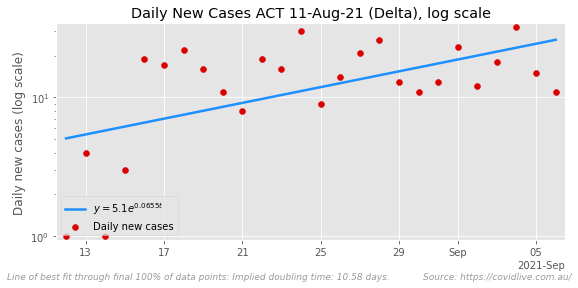

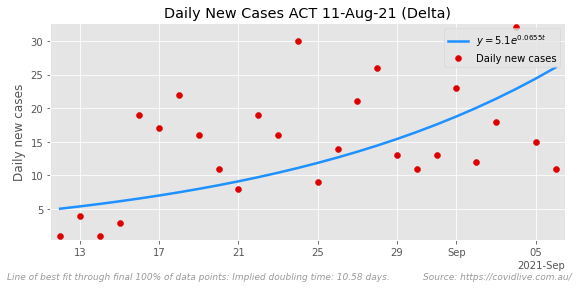

In [46]:
for name, (state, start, stop) in Current_outbreaks.items():    
    print('=' * 50)
    print(name)

    # bog standard exponential regression over the whole outbreak period
    log_regression_plot(name, state, start, stop, forward=0)
    
    # a series of forward projection plots
    log_regression_plot(name, state, start, stop, forward=7)
    #log_regression_plot(name, state, start, stop, forward=30)    
    #log_regression_plot(name, state, start, stop, forward=60)

    # let's look at the last few days as an out-of-sample projection
    if any([state_abbrev in name for state_abbrev in ('Vic', 'NSW')]):
        log_regression_plot(name, state, start, stop, final_oos=7)
        
    # plot an early days of an outbreak chart
    log_regression_plot(name, state, start, 28, tail=1.0)


## Outbreak Growth Factors

### Rolling doubling time

In [47]:
# calculate using a regression best fit approach
def get_rolling_dt(name, state, start, stop, period):
    data = get_local_daily(state, start, stop).iloc[1:] # ignore initial zero day
    if len(data) <= period: return None
    
    series = pd.Series(np.nan, index=data.index)
    for start in range(0, len(data)-period+1):
        data_slice = data.iloc[start:start+period]
        result = get_exp_regression(data_slice)
        if result is None: return None
        y_pred, formula, k, a = result
        series[data_slice.index[-1]] = k

    series = series.dropna()
    lfooter = 'Calculated from the best fit for data points'
    return series, lfooter

In [48]:
# calculated from end-points on a Henderson smoothed series
def get_rolling_dt_hendo(name, state, start, stop, period):
    data = get_local_daily(state, start, stop).iloc[1:] # ignore initial zero day
    if len(data) <= period: return None
    data = pd.Series(Henderson.Henderson(data, period), index=data.index)
    data = data.where((data > 1) | data.isna(), other=1.0)
    series = pd.Series(np.nan, index=data.index)
    for start in range(0, len(data)-period+1):
        data_slice = data.iloc[start:start+period]
        k = np.log(data_slice.iloc[-1] / data_slice.iloc[0]) / period
        series[data_slice.index[-1]] = k

    series = series.dropna()
    lfooter = 'Calculated from end-points on a Henderson moving average'

    return series, lfooter

In [49]:
# this plotting function is a bit of a hack ...
def plot_exponents(data, name, period, lfooter, method=''):
    
    # constants
    MARGINS = 0.02
    
    # get canvass
    fig, ax = plt.subplots()
    ax.figure.set_size_inches((8, 4))
    ax.margins(MARGINS)
    ax.set_ylabel('$k$ from $y=ae^{kt}$') 
    
    # duplicate the axes
    axr = ax.twiny().twinx()
    axr.margins(MARGINS)
    axr.set_ylabel('Doubling time in days') 
    
    # No x-ticks at the top
    axr.xaxis.set_ticks([])
    axr.xaxis.set_ticklabels([])
        
    # plot the data
    if data.ndim == 1:
        ax.plot(data.index, data, lw=2.5)
        ax.set_xlabel(None)
        lfooter += f'. Latest DT: {np.log(2) / data.iloc[-1]:,.2f} days.'
    else:
        for col in data.columns:
            ax.plot(data[col].index, data[col], lw=2.5, label=col)
        ax.legend(loc='best')
        ax.set_xlabel(f'Day of Outbreak (after first {period} days)')
    
    # right-hand y-axis
    locations = ax.get_yticks()
    new_labels = [f'{np.log(2)/x:,.2f}' if x != 0 else '∞' for x in locations ]
    axr.yaxis.set_ticks(locations)
    axr.yaxis.set_ticklabels(new_labels)
    axr.set_axisbelow(True) 

    # remove the grid
    axr.grid(False, which='both')

    # match the left and right ylimit settings
    axr.set_ylim(ax.get_ylim()) 
    axr.set_xlim(ax.get_xlim())

    # title
    title = (f'{period}-day Rolling Growth - {name}')
    if method:
        title += f' ({method})'
    ax.set_title(title)
    
    fig.tight_layout(pad=1.1)
    
    # footers
    fig.text(0.01, 0.005, lfooter,
            ha='left', va='bottom',
            fontsize=9, fontstyle='italic',
            color='#999999')
    fig.text(0.99, 0.005, SOURCE,
            ha='right', va='bottom',
            fontsize=9, fontstyle='italic',
            color='#999999')

    # save
    filename = CHART_DIRECTORY + title + '.png'
    fig.savefig(filename, dpi=300)
    
    # display and close
    plt.show()
    plt.close('all')    

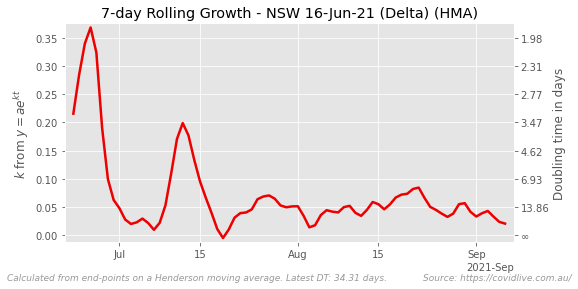

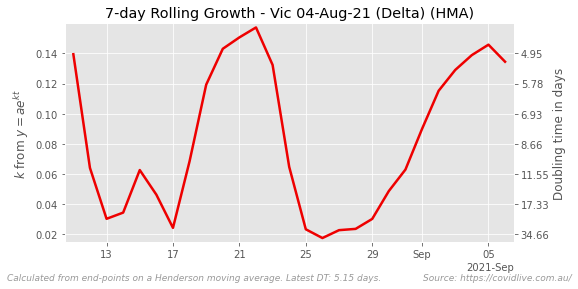

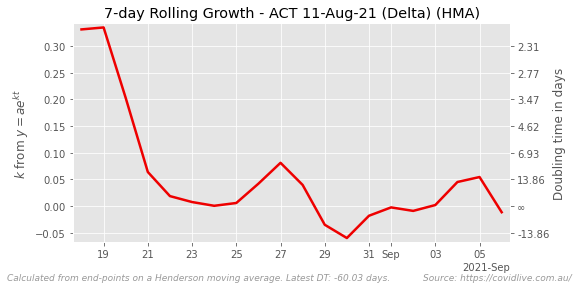

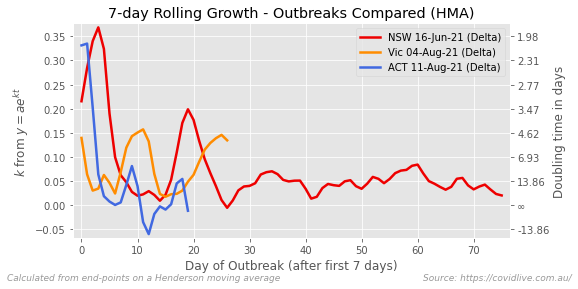

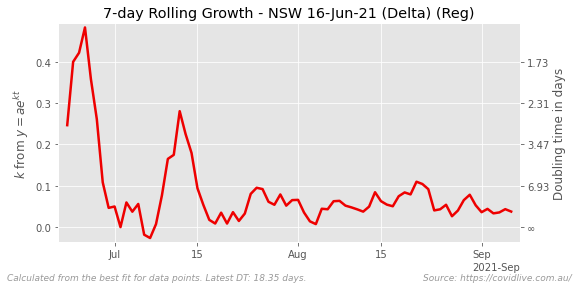

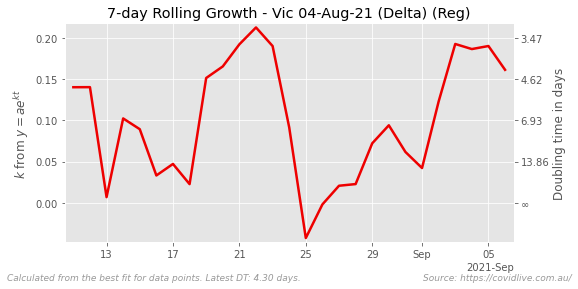

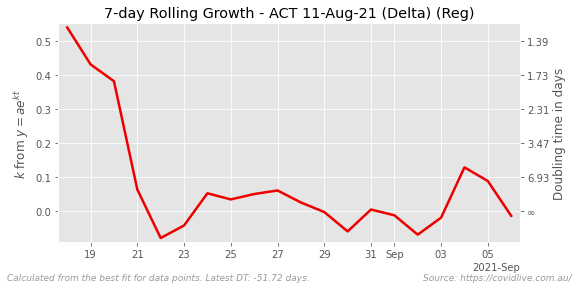

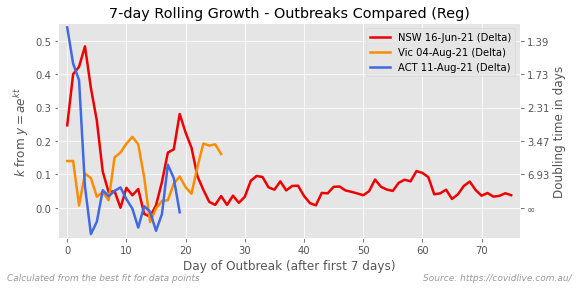

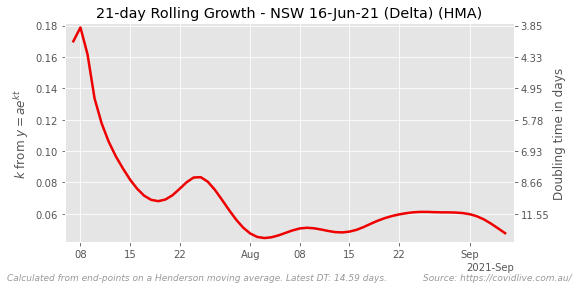

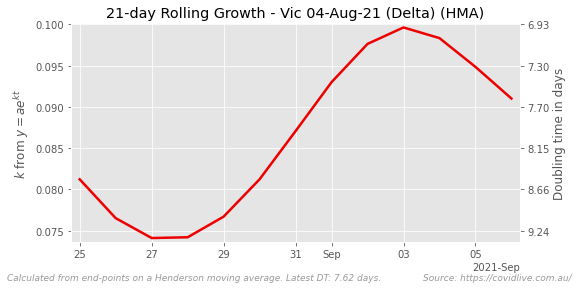

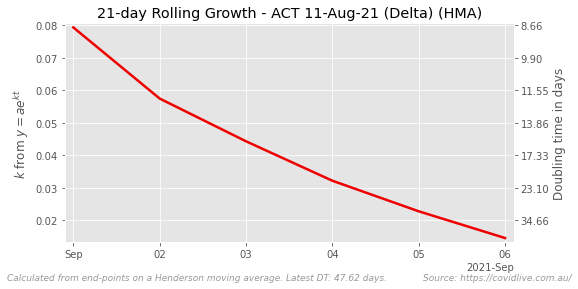

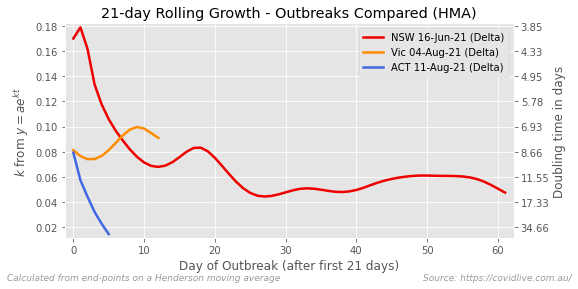

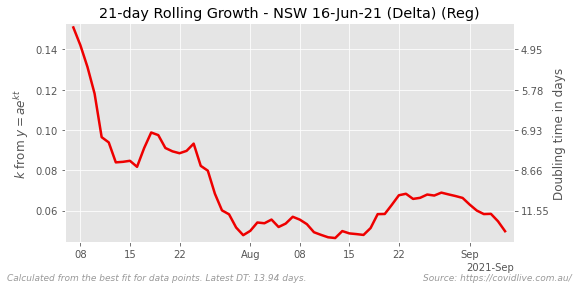

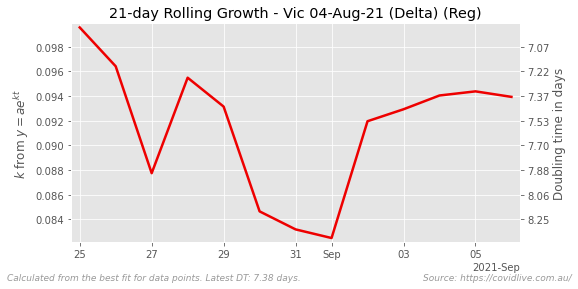

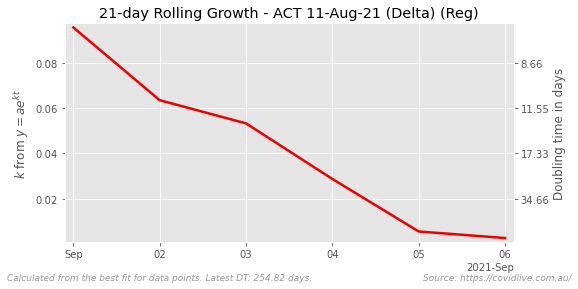

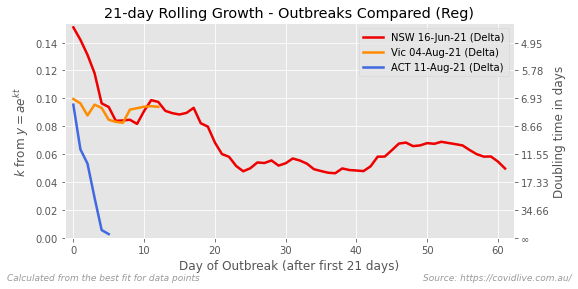

In [50]:
colours = ['#ee0000', 'darkorange', 'royalblue', '#555555']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colours)
for rolling in (7, 21):
    for function, method in zip((get_rolling_dt_hendo, get_rolling_dt), ('HMA', 'Reg')):
        combined = {}
        for name, (state, start, stop) in Current_outbreaks.items():
            series, lfooter = function(name, state, start, stop, rolling)
            combined[name] = series.reset_index(drop=True)
            plot_exponents(series, name, rolling, lfooter, method)

        plot_exponents(pd.DataFrame(combined), 'Outbreaks Compared', rolling, lfooter, method)

### Growth Factors

Check Vic 09-Jun-20 (2nd Wave) starting point: [0. 4.]


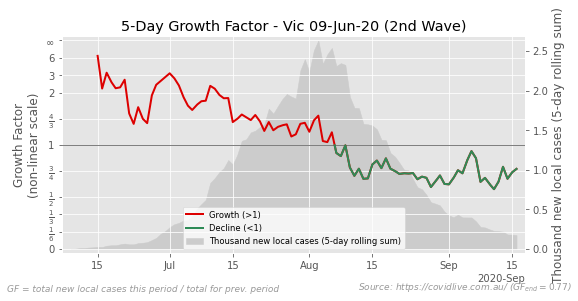

Check NSW 16-Jun-21 (Delta) starting point: [0. 2.]


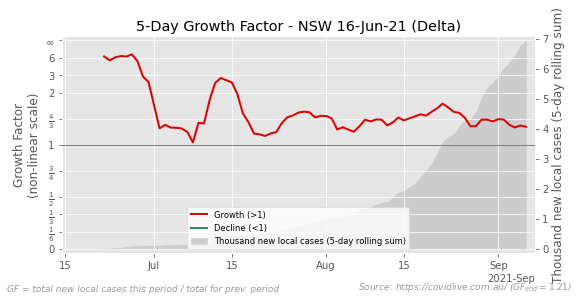

Check Vic 04-Aug-21 (Delta) starting point: [0. 7.]


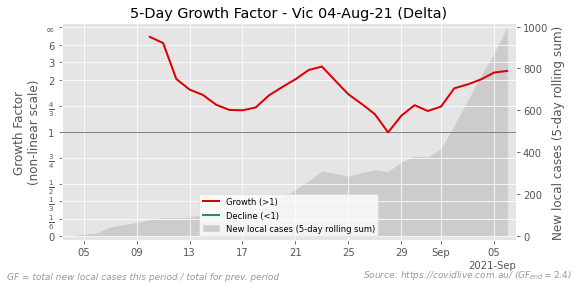

Check ACT 11-Aug-21 (Delta) starting point: [0. 1.]


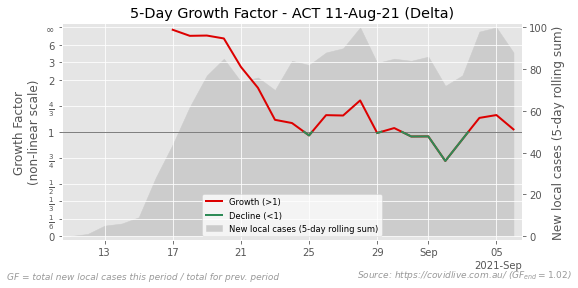

In [51]:
GROWTH_FACTOR_LIST = [5, ] # [5, 7]

gf = {}
for name, (state, start, length) in Vic_2020_vs_Delta.items():
    s = get_local_daily(state, start=start, stop=length)
    print(f'Check {name} starting point: {s[:2].values}')
    
    for period in GROWTH_FACTOR_LIST:

        index = f'{name}{period}'
        gf[index] = ps.plot_growth_factor(
            s,
            period=period,
            mode = 'new local cases',
            title=f'{period}-Day Growth Factor - {name}', 
            ylabel='Growth Factor',
            loc='lower center',
            xlabel=None,
            **std_plot_settings
        )

### Model for the effective reproduction number $R_t$

The SIR compartmental model in discrete terms can be expressed with the following three equations:


1.   $S_t=S_{t-1}-\beta_tI_{t−1}\frac{S_{t−1}}{N}$

1.   $I_t=I_{t−1}+\beta_tI_{t−1}\frac{S_{t−1}}{N}-\gamma I_{t−1}$

1.   $R_t=R_{t−1}+\gamma I_{t−1}$

Where:
*   $\beta_t$ = $R_t$ / infectious period
*   $\gamma$ = 1 / infectious period

The middle line of this set of equations shows that the number infectious on day t is the number infectious on the previous day, plus the newly infectious on day t, minus those who are no longer infectious on day t.

We can take the middle element, assume that S/N is one, and derive the effective reproduction number ($R_t$), based on the following identity:

$$
R_t = \frac{newly\ infectious_t}{infectious\ cohort_{t-1}} * infectious\ period
$$

Note: assuming S/N is one is analogous to a two state SI model, where the recovered people are returned to the susceptible population (at least for small number of infected persons). 

We will smooth the daily infections data in order to manage noise.

We are assuming the average infectiousness period is 7 days for COVID19. 

In [52]:
def model_effective_reproduction(newly_infectious_on_day, 
                                 infectious_period=7):

    # Need at least infectious period data to make sense
    IGNORE_INITIAL = infectious_period + 1 # days 
    SMOOTH_TERM = 13
    
    # sanity check
    if len(newly_infectious_on_day) < SMOOTH_TERM:
        print(f'Insufficient data to calculate the effective reproduction number')
        return None
    
    
    # smooth infections data
    newly_infectious_t = Henderson.Henderson(newly_infectious_on_day, SMOOTH_TERM)
    #newly_infectious_t = newly_infectious_on_day # skip smoothing
    
    infectious_t_minus_1 = (
        newly_infectious_t
        .rolling(infectious_period, min_periods=1)
        .sum()
        .shift(1)
        .dropna()
    )
    
    return (newly_infectious_t / infectious_t_minus_1 * infectious_period)[IGNORE_INITIAL:]
    

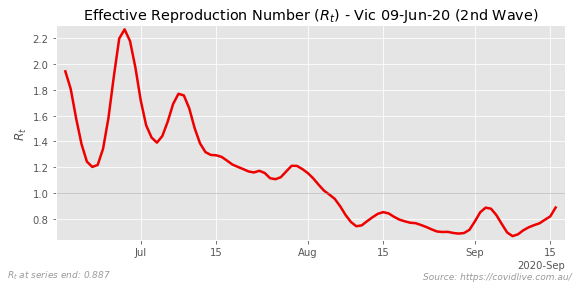

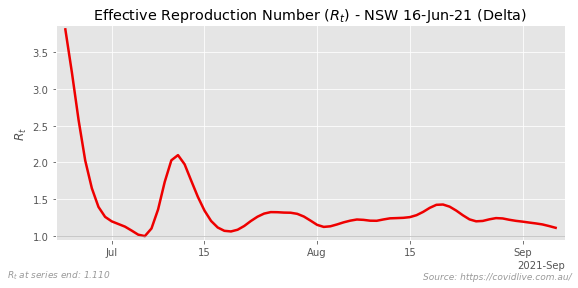

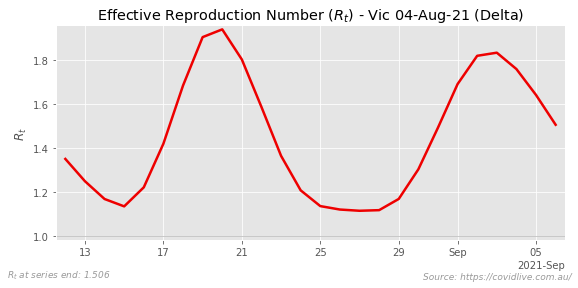

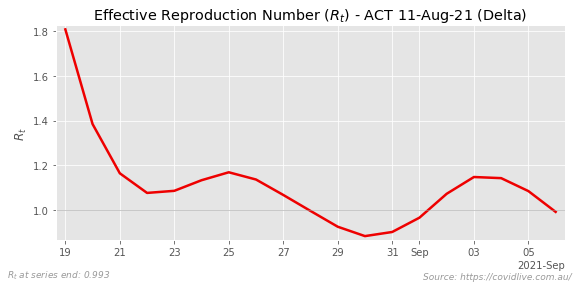

In [53]:
repo_numbers = {}
for name, (state, start, length) in Vic_2020_vs_Delta.items():
    
    # calculate
    span = length if length else 120 # days
    s = get_local_daily(state, start=start, stop=span)
    ip=7
    R_t = model_effective_reproduction(s, ip)
    if R_t is None:
        continue
    repo_numbers[name] = R_t
    
    # plot
    fig, ax = plt.subplots()
    ax.plot(R_t.index.values, R_t.values, lw=2.5, label=name)
    ax.axhline(y=1, color='#999999', lw=0.5, linestyle='-')
    ps.finalise_plot(ax,
            title=f'Effective Reproduction Number ($R_t$) - {name}',
            ylabel='$R_t$',
            xlabel=None,
            lfooter='$R_{t}$ at series end: ' f'{R_t[-1]:0.3f}',
            **std_plot_settings,
                    )

### Comparative $R_t$ and GF

Note that the 5-day on 5-day growth factor is a good proxy for the effective reproduction number (in this case).

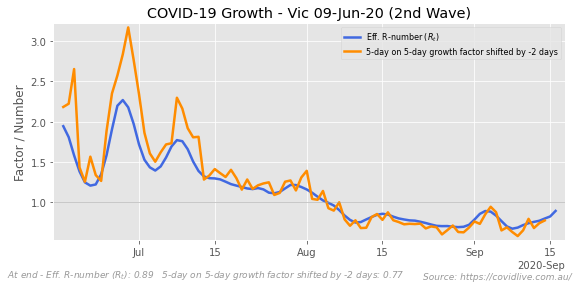

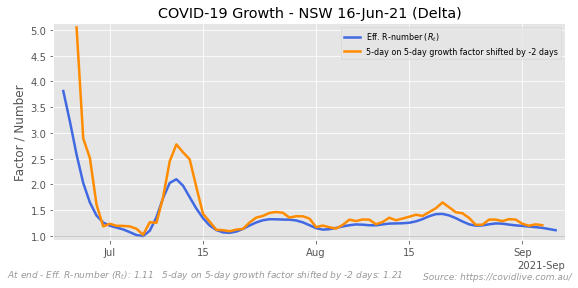

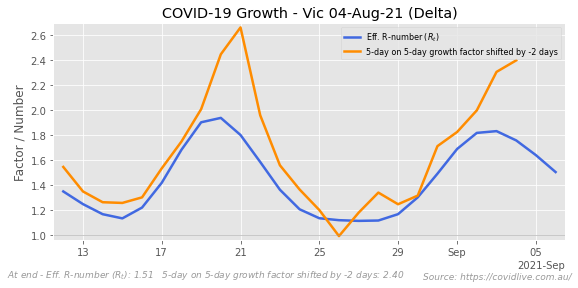

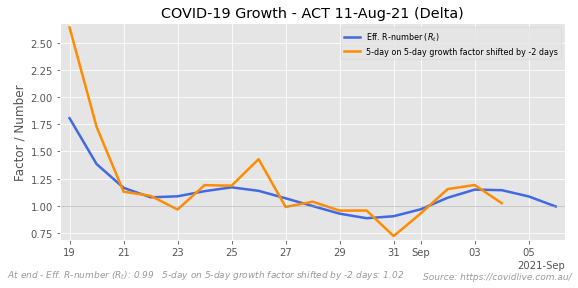

In [54]:
frames = {}
MAX_FACTOR = 6 # used for capping the y axis (None to ignore)
for r, s in repo_numbers.items():
    
    for period in GROWTH_FACTOR_LIST:
        index = f'{r}{period}'
        dict_frame = {}
        rt_label = 'Eff. R-number ($R_t$)'
        dict_frame[rt_label] = s

        if index in gf:
            shift = int(-period // 2) + 1
            shifted = gf[index].shift(shift)
            dict_frame[f'{period}-day on {period}-day growth '
              f'factor shifted by {shift} days'] = shifted
        
        frames[r] = pd.DataFrame(dict_frame).dropna(how='all')
        frames[r] = frames[r][frames[r][rt_label].notna()]
            
    fig, ax = plt.subplots()
    colours = ['#dd0000', 'darkorange', 'royalblue', ]
    tag = 'At end - '
    for col in frames[r].columns:
        line = frames[r][col].copy()
        tag += f'{col}: {line.dropna()[-1]:0.2f}   '
        if MAX_FACTOR:
            line = line.where(line < MAX_FACTOR, other=np.nan)
        ax.plot(line.index.values, line.values, lw=2.5, 
                c=colours.pop(), label=col)
    ax.axhline(y=1, lw=0.5, c='#999999')
    ax.legend(loc='best', prop={'size': 8})
    ps.finalise_plot(ax,
            title=f'COVID-19 Growth - {r}',
            ylabel='Factor / Number',
            lfooter=tag,
            xlabel=None,
            **std_plot_settings,
    )
    

### Short-run projections for local new case growth
$$
y = x_{0}e^{kt}; 
$$
Where ...
$$
k = \frac{ln(\frac{x_t}{x_{t-n}})}{n}
$$

In [55]:
def extrapolate(name, state, start, stop):
    """Construct an exponential short-run projection based on recent period growth.
       Note: on small numbers, this model can be overwhelmed by noise."""
    
    # projection parameters
    outlook = 15 # projection days
    term = 15 # days - term for henderson moving average
    pperiod = [3, 7,] # most recent days for establishing growth projection
    
    # get current underlying trend
    s = get_local_daily(state, start=start, stop=stop)
    if len(s) <= term: 
        print(f'{name}: insufficient data for a forecast')
        return
    s_smoothed = Henderson.Henderson(s, term)

    # calculate daily exponetial growth rate
    INDEX_CASE = -1
    stop = max(0, s_smoothed[INDEX_CASE])
    projections = {}
    for period in pperiod:
        if period > term: continue
        if period > len(s_smoothed): continue
        start = max(0, s_smoothed[-period])
        if start == 0: continue
        k = np.log(stop/start) / period
        #print(f'start, stop, k: {start, stop, k}')
        projection = np.arange(0, outlook)
        projection = stop * np.exp(projection * k)
        projection = pd.Series(projection, 
                               index = pd.date_range(s.index[INDEX_CASE], 
                                         periods=outlook, freq='D'))
        projection = projection.drop(projection.index[0])
        projections[f'Projection based on last {period} days of smoothed series ~ $y='
                    f'{stop:,.2f}' 'e^{' f'{k:.4f}t' '}$'] = projection
        print(f'{period}: {projection.round(1).to_list()}')
    
    pframe = {'Historic cases': s,
              'Smoothed cases': s_smoothed,
              **projections}
    pframe = pd.DataFrame(pframe)
    

    colours = ['#dd0000', 'darkorange', 'dodgerblue', 'darkblue']
    lw = [2.5, 1, 2.5, 2.5, 2.5]
    fig, ax = plt.subplots()
    for i, col in enumerate(pframe.columns.to_list()):
        line = pframe[col]
        ax.plot(line.index, line, c=colours[i], lw=lw[i], label=col)
    
    ax.legend(loc='best', prop={'size': 8})
    ps.finalise_plot(ax, 
                     title=f'Outbreak Projection for {name}',
                     xlabel=None,
                     ylabel='Number of daily new cases',
                     **std_plot_settings,
                    )


3: [1440.3, 1455.3, 1470.4, 1485.7, 1501.1, 1516.7, 1532.4, 1548.3, 1564.4, 1580.7, 1597.1, 1613.7, 1630.4, 1647.4]
7: [1460.1, 1495.4, 1531.7, 1568.8, 1606.8, 1645.8, 1685.6, 1726.5, 1768.3, 1811.2, 1855.1, 1900.0, 1946.1, 1993.3]


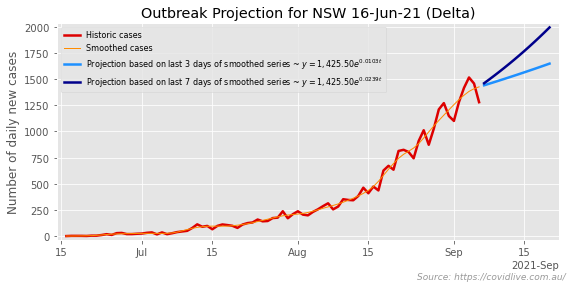

3: [237.5, 249.7, 262.6, 276.1, 290.3, 305.2, 320.9, 337.5, 354.8, 373.1, 392.3, 412.5, 433.7, 456.1]
7: [251.9, 281.0, 313.4, 349.6, 389.9, 434.9, 485.1, 541.1, 603.5, 673.2, 750.9, 837.5, 934.1, 1041.9]


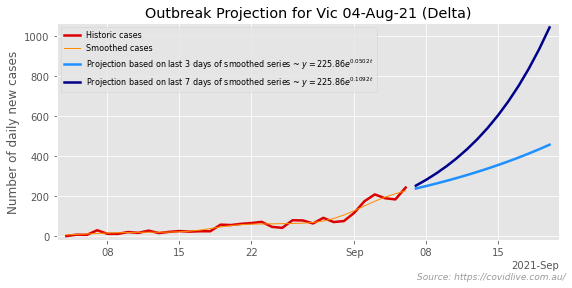

3: [18.0, 17.9, 17.7, 17.5, 17.3, 17.1, 16.9, 16.7, 16.6, 16.4, 16.2, 16.0, 15.9, 15.7]
7: [18.5, 18.8, 19.1, 19.4, 19.7, 20.0, 20.3, 20.7, 21.0, 21.3, 21.6, 22.0, 22.3, 22.7]


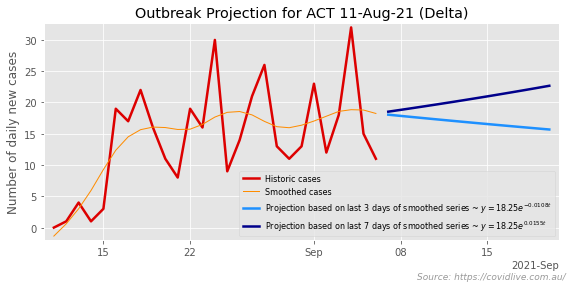

In [56]:
if True:
    
    for name, (state, start, stop) in Current_outbreaks.items():
        extrapolate(name, state, start, stop)


## Hospitalised

In [57]:
# set-up
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=AU_COLOURS)

In [58]:
# get data
idents = ['MED_HOSP_CNT', 'MED_ICU_CNT', 'MED_VENT_CNT']
descs = ['Hospitalised', 'ICU', 'Ventilator']
hospital = {}
for ident, desc in zip(idents, descs):
    data = get_pivot_table(raw_json_data, ident)
    data.index = pd.DatetimeIndex(data.index)
    data = data.dropna(axis=0, how='all')
    hospital[ident] = data

Lastest value less than its predecessor in MED_VENT_CNT for Australia, NSW


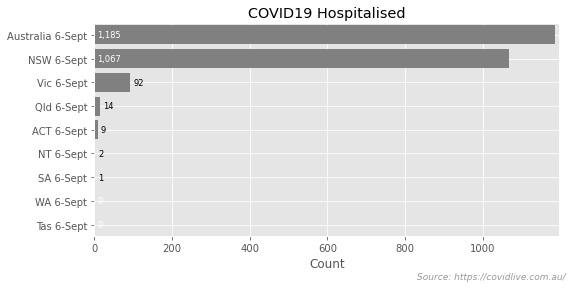

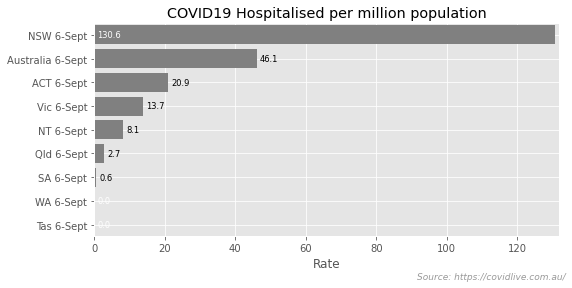

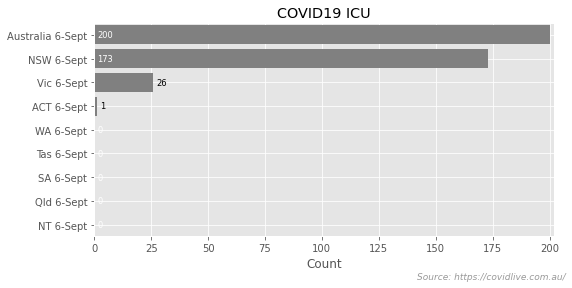

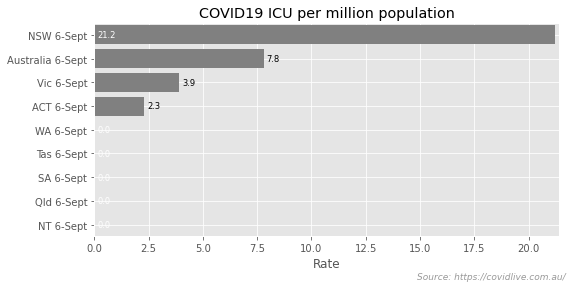

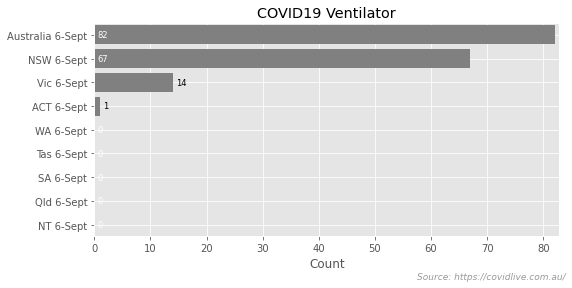

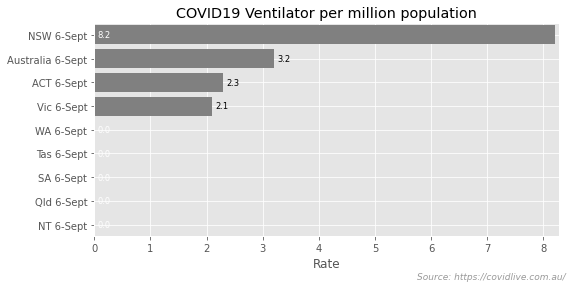

In [59]:
# bar charts
for item, desc in zip(idents, descs):
    two_bar_plots(hospital, item, '', desc)

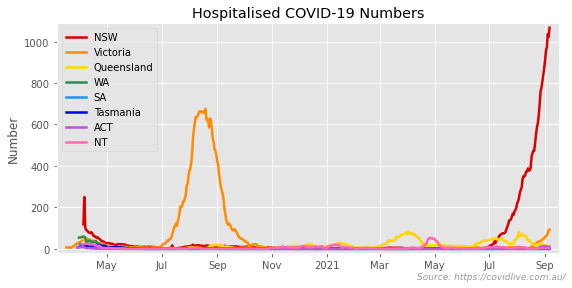

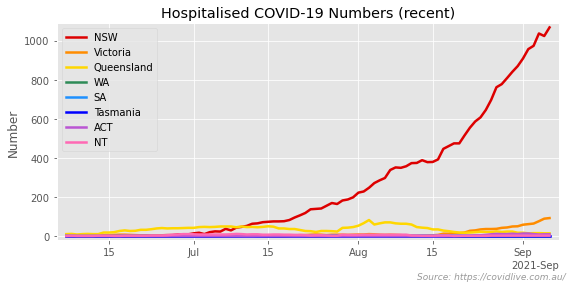

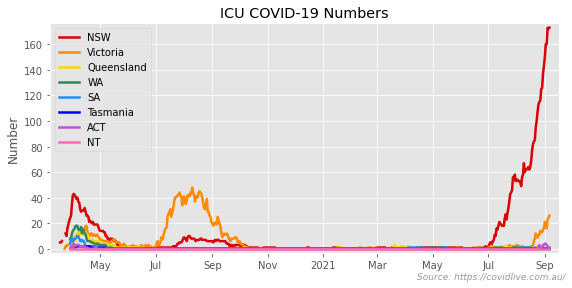

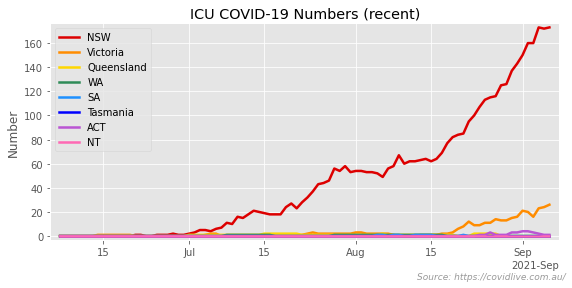

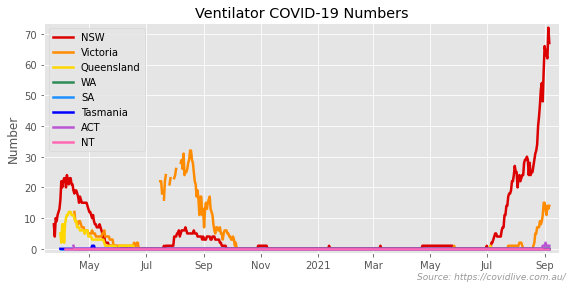

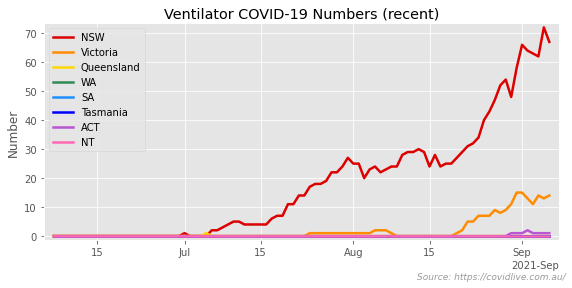

In [60]:
# line charts
for item, desc in zip(idents, descs):
    data = hospital[item]
    line_plots(data, f'{desc} COVID-19 Numbers', 'Number')

## Explore cases to deaths and cases to hospitalisation curves

### supporting functions

In [61]:
def _prune(series, start, stop):
    return series[(series.index >= pd.Timestamp(start))
                  & (series.index <= pd.Timestamp(stop))]
    
def _get_data(item, state, start, stop):
    data = (
        daily_c[item][state]
        .dropna() # for NaNs at series end
    )
    return _prune(data, start, stop)

def _get_data_direct(item, state, start, stop):
    data = (
        get_item(item, raw_json_data)[state]
        .dropna()
    )
    return _prune(data, start, stop)

In [62]:
def get_daily_cases_deaths(state, start, stop):
    cases = _get_data('CASE_CNT', state, start, stop)
    deaths = _get_data('DEATH_CNT', state, start, stop)
    return cases, deaths

In [63]:
CD_SMOOTHING = 7 

def cd_comparison_plot(raw_cases, raw_deaths, 
                       name, d_shift, rolling=CD_SMOOTHING):
    
    # calculate factor adjusting for the left shift in deaths
    total_cases = raw_cases.iloc[:-d_shift].sum() if d_shift else raw_cases.sum()
    total_deaths = raw_deaths.sum()
    factor = total_cases / total_deaths
    print(f'Factor: {factor}; inverse: {1.0/factor}')

    # prepare for plotting
    cases = raw_cases.rolling(rolling).mean()
    deaths = factor * raw_deaths.rolling(rolling).mean().shift(-d_shift)

    suffix = f'{rolling}-day MA'
    deaths_label = f'Deaths * {factor:0.2f} {suffix}'
    if d_shift:
        deaths_label += f'; left-shift: {-d_shift} days'

    # plotting
    fig, ax = plt.subplots()
    data = (
        pd.DataFrame([cases, deaths], index=[f'Cases {suffix}', deaths_label])
        .dropna(axis=1, how='all')
        .T
    )
    for col in data.columns:
        series = data[col]
        ax.plot(series.index, series, lw=2.5, label=col)

    title = name + f' - {rolling}-day Moving Ave'
    if d_shift:
        title += '; deaths left shifted'
        ax.figure.text(x=0.01, y=0.99, 
                       s=f'{total_deaths:,.0f} deaths for {total_cases:,.0f} '
                       f'cases (of {raw_cases.sum():,.0f})',
                       ha='left', va='top',
                       fontsize=8, fontstyle='italic',
                       color='#999999')
        
    multiplier = 100
    ax.legend(loc='best')
    ps.finalise_plot(ax, 
                     title=title, 
                     xlabel=None,
                     ylabel='Number of daily new cases',
                     lfooter=f'{1/factor*multiplier:0.1f} deaths per {multiplier:,} cases',
                     **std_plot_settings,
                    )


In [64]:
def get_best_left_shift(raw_cases, raw_deaths, smooth=CD_SMOOTHING):

    # calculate cases to deaths factor 
    # inflate deaths to achieve parity
    deaths = raw_deaths.copy()
    factor = raw_cases.sum() / raw_deaths.sum()
    deaths = deaths * factor
    
    # smooth both series (because they are so noisy)
    cases = raw_cases.rolling(smooth, center=True, min_periods=1).mean()
    deaths = deaths.rolling(smooth, center=True, min_periods=1).mean()
   
    # test a range of possible options and find the best (minimum)
    max_difference = np.inf
    best = None
    results = {}
    for deviation in range(0, 30):
        abs_difference = (cases - deaths.shift(-deviation))
        abs_difference = abs_difference.abs().sum() 
        abs_difference += deaths.iloc[:deviation].sum(skipna=True) # correct for left shift loss
        results[deviation] = abs_difference
        if abs_difference < max_difference:
            max_difference = abs_difference
            best = deviation
            
    #print(results)
    return best

In [65]:
def running_death_rate(raw_cases, raw_deaths, 
               name, d_shift, rolling=CD_SMOOTHING, 
                       ignore_first=7):
    
    # compute
    deaths = raw_deaths.cumsum()
    cases = raw_cases.shift(d_shift).cumsum()
    running_rate = (
        (deaths / cases)
        .replace(np.inf, 0)
        .replace(0, np.nan)
        .dropna()
    )[ignore_first:] * 100 # per cent
    # note: smoothing means the factor above will differ slightly
    #running_rate = Henderson.Henderson(running_rate, CD_SMOOTHING)
    
    # plot
    title = f'Deaths per 100 diagnosed cases: {name}'
    if d_shift:
        lfooter = f'Comulative deaths today compared with cases {d_shift} days ago (smoothed)'
    
    fig, ax = plt.subplots()
    ax.plot(running_rate.index, running_rate, lw=2)
    ps.finalise_plot(ax, 
                     title=title, 
                     xlabel=None,
                     ylabel='Death rate (%)',
                     lfooter=lfooter,
                     **std_plot_settings,
                    )
    
    return(running_rate)
    

### Establish historical baseline

Factor: 23.29338327091136; inverse: 0.04293064637152964


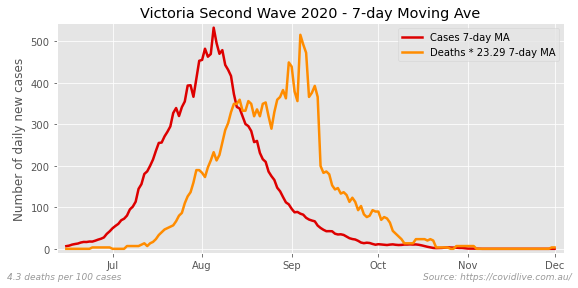

Factor: 23.29338327091136; inverse: 0.04293064637152964


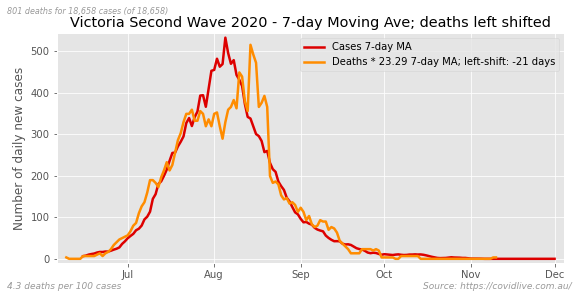

In [66]:
historical = {
        'Victoria Second Wave 2020': ('Victoria', '2020-06-09', '2020-12-01'),
}

for name, (state, start, stop) in historical.items():
    cases, deaths = get_daily_cases_deaths(state, start, stop)
    cd_comparison_plot(cases, deaths, name, 0)
    best_shift = get_best_left_shift(cases, deaths)
    cd_comparison_plot(cases, deaths, name, best_shift)

### Use above baseline to look at the recent Sydney Delta outbreak

In [67]:
current = {
        'NSW June 2021 (Delta)': ('NSW', '2021-06-09', '2021-12-01'),
        #'Vic August 2021 (Delta)': ('Victoria', '2021-08-04', '2021-12-01'),
}


Factor: 63.93129770992366; inverse: 0.01564179104477612


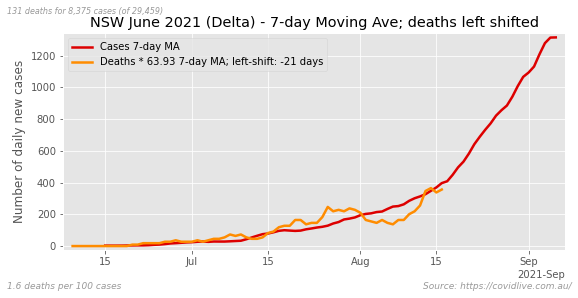

In [68]:
for name, (state, start, stop) in current.items():
    cases, deaths = get_daily_cases_deaths(state, start, stop)
    cd_comparison_plot(cases, deaths, name, best_shift)

### Running death rates

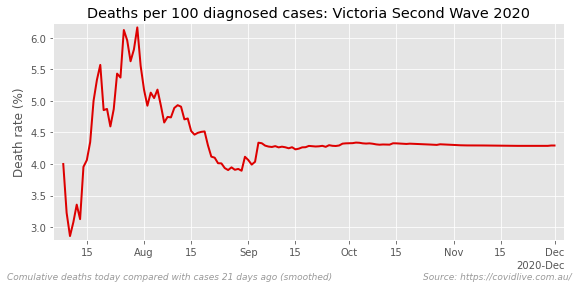

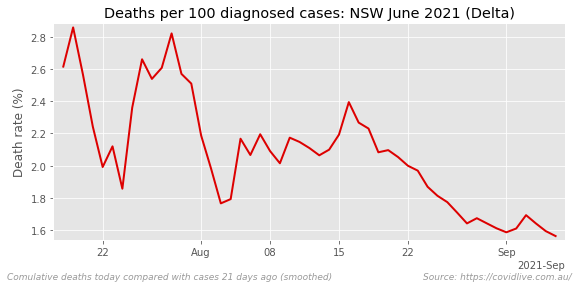

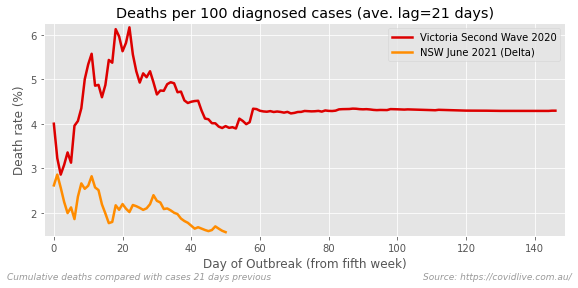

In [69]:
examine = {**historical, **current}
comparator = {}
all_deaths = {}

shift = best_shift # from melbourne 2nd wave above
for name, (state, start, stop) in examine.items():
    cases, deaths = get_daily_cases_deaths(state, start, stop)
    all_deaths[name] = deaths.cumsum().replace(0.0, np.nan).dropna().reset_index(drop=True)
    series = running_death_rate(cases, deaths, name, shift)
    if not len(deaths): continue
    comparator[name] = series.reset_index(drop=True)
        
comparator = pd.DataFrame(comparator)
fig, ax = plt.subplots()
comparator.plot(ax=ax, lw=2.5)
ps.finalise_plot(ax, 
                 title=f'Deaths per 100 diagnosed cases (ave. lag={shift} days)', 
                 xlabel='Day of Outbreak (from fifth week)',
                 ylabel='Death rate (%)',
                 lfooter=f'Cumulative deaths compared with cases {shift} days previous',
                 **std_plot_settings,
                )
       

### running death cumulative sum

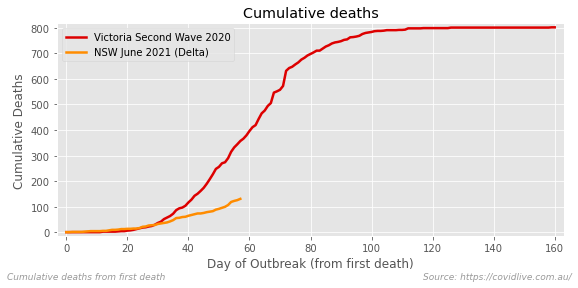

In [70]:
all_deaths = pd.DataFrame(all_deaths)
fig, ax = plt.subplots()
all_deaths.plot(ax=ax, lw=2.5)
ps.finalise_plot(ax, 
                 title=f'Cumulative deaths', 
                 xlabel='Day of Outbreak (from first death)',
                 ylabel='Cumulative Deaths',
                 lfooter=f'Cumulative deaths from first death',
                 **std_plot_settings,
                )


### Active cases and hospitalisations (stock statistics)

In [71]:
def get_active_hospital(state, start, stop, item='MED_HOSP_CNT'):
    active = _get_data_direct('ACTIVE_CNT', state, start, stop)
    hospit = _get_data_direct(item, state, start, stop)
    return active, hospit

In [72]:
def plot_ah(active, hospitalised, name, shift=0, other=''):
    FACTOR = 100
    activesum = active.sum() if not shift else active[:-shift].sum()
    rate = (hospitalised.sum() / activesum) * FACTOR
    
    fig, ax = plt.subplots()
    ax.plot(active.index, active, lw=2.5, label='Active cases')
    ax.plot(hospitalised.index, hospitalised, lw=2.5, label=f'Hospitalised {other}cases')
    ax.legend(loc='best')
    lfooter = f'{rate:0.2f} hospital {other}days per {FACTOR} active case days'
    if shift:
        lfooter += f' (ignoring last {shift} days of cases)'
    ps.finalise_plot(ax,
                     title=f'Active and {other}Hospitalised Cases - {name}',
                     ylabel='Case numbers on day',
                     lfooter=lfooter,
                     **std_plot_settings,
                    )
    
    # plot a progressive rate
    HMA = 13
    active_dropped = active.shift(shift).dropna()
    active_h = Henderson.Henderson(active_dropped, HMA)
    hospital_dropped = hospitalised.dropna()
    hospital_h = pd.Series(Henderson.Henderson(hospitalised.dropna(), HMA),
                           index=hospital_dropped.index)
    rate_h = (hospital_h / active_h * FACTOR).dropna()[7:] # ignore early days
    fig, ax = plt.subplots()
    ax.plot(rate_h.index, rate_h, lw=2.5, label='Rute of hospitalised cases')
    ps.finalise_plot(ax,
                     title=f'Hospitalisation Rate - {name}',
                     ylabel='Trend Hospital Days per\n100 Active Case Days',
                     lfooter=f'Cases right shifted {shift} days. '
                              'Both series smoothed. '
                             f'Endpoint: {rate_h.iloc[-1]:,.2f}',
                     **std_plot_settings,
                    )


Lastest value less than its predecessor in ACTIVE_CNT for ACT, WA


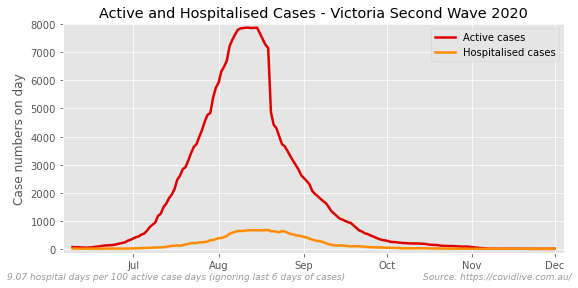

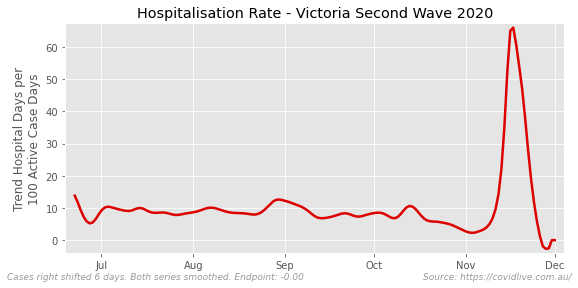

In [73]:
for name, (state, start, stop) in historical.items():
    active, hospitalised = get_active_hospital(state, start, stop)
    shift = get_best_left_shift(active, hospitalised, smooth=CD_SMOOTHING)
    plot_ah(active, hospitalised, name, shift)


In [74]:
current = {
        'NSW June 2021 (Delta)': ('NSW', '2021-06-09', '2021-12-01'),
        'ACT Aug-21 (Delta)':    ['ACT', '2021-08-11', '2021-12-01', ], 
        'Vic Jul-21 (Delta)':    ['Victoria', '2021-07-14', '2021-12-01', ], 
}

Lastest value less than its predecessor in ACTIVE_CNT for ACT, WA


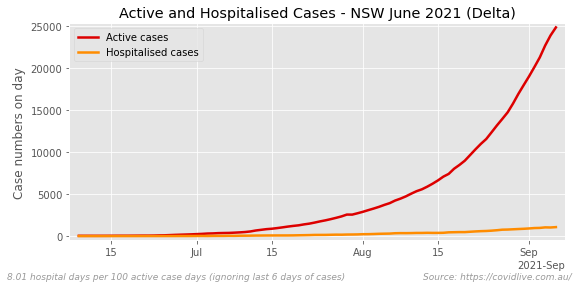

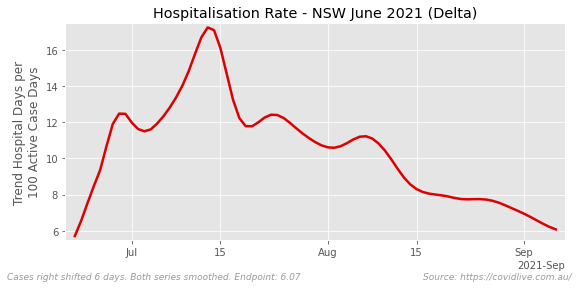

Lastest value less than its predecessor in ACTIVE_CNT for ACT, WA


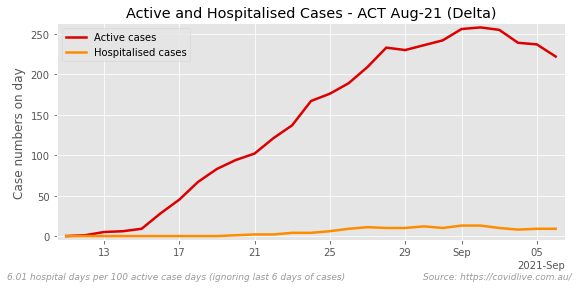

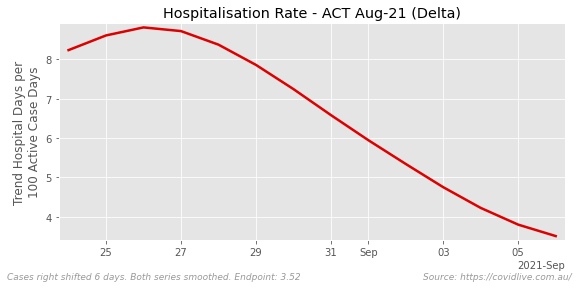

Lastest value less than its predecessor in ACTIVE_CNT for ACT, WA


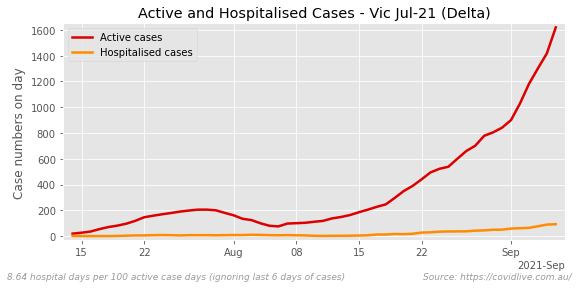

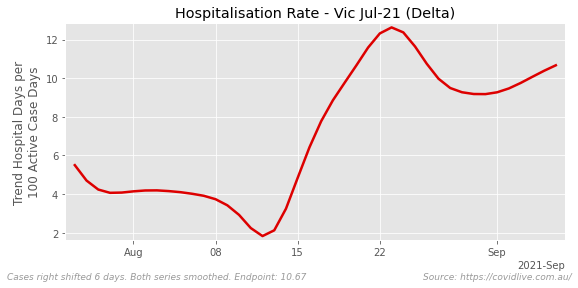

In [75]:
for name, (state, start, stop) in current.items():
    active, hospitalised = get_active_hospital(state, start, stop)
    plot_ah(active, hospitalised, name, shift)

In [76]:
if False:
    for name, (state, start, stop) in historical.items():
        active, hospitalised = get_active_hospital(state, start, stop, item='MED_ICU_CNT')
        shift = get_best_left_shift(active, hospitalised, smooth=CD_SMOOTHING)
        print('---', shift, '---')
        plot_ah(active, hospitalised, name, shift=shift, other='ICU ')

In [77]:
if False:
    for name, (state, start, stop) in current.items():
        active, hospitalised = get_active_hospital(state, start, stop, item='MED_ICU_CNT')
        plot_ah(active, hospitalised, name, shift=shift, other='ICU ')

## Vaccination plots

In [78]:
items = ['VACC_DOSE_CNT', 'VACC_PEOPLE_CNT', 
'VACC_AGED_CARE_CNT', 'VACC_GP_CNT', 'VACC_FIRST_DOSE_CNT',]
data = {}
for item in items:
    data[item] = get_item(item, raw_json_data)

Lastest value less than its predecessor in VACC_GP_CNT for NT


In [79]:
data['VACC_DOSE_CNT'].diff().tail()

NAME            ACT  Australia       NSW      NT  Queensland       SA  \
REPORT_DATE                                                             
2021-09-02   7389.0   330586.0  139914.0  2796.0     48933.0  16973.0   
2021-09-03   5332.0   301399.0  114726.0  2294.0     49750.0  18137.0   
2021-09-04   7048.0   312275.0  129258.0  2258.0     46663.0  17824.0   
2021-09-05   4430.0   213595.0   94698.0   962.0     31068.0   9352.0   
2021-09-06   3835.0   130636.0   48051.0   776.0     20483.0   6666.0   

NAME         Tasmania  Victoria       WA  
REPORT_DATE                               
2021-09-02     5896.0   81683.0  27002.0  
2021-09-03     5489.0   78632.0  27039.0  
2021-09-04     5407.0   79351.0  24466.0  
2021-09-05     4050.0   51561.0  17474.0  
2021-09-06     2193.0   35857.0  12775.0

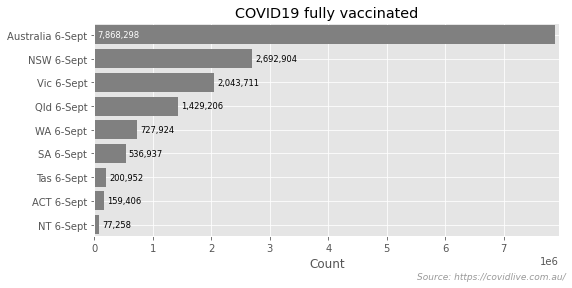

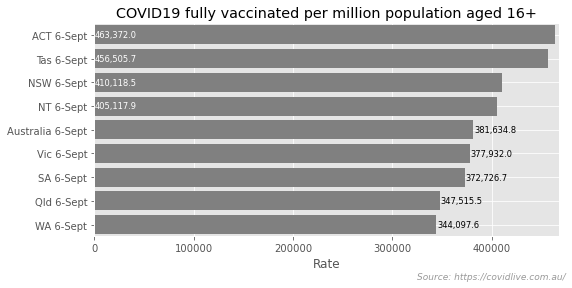

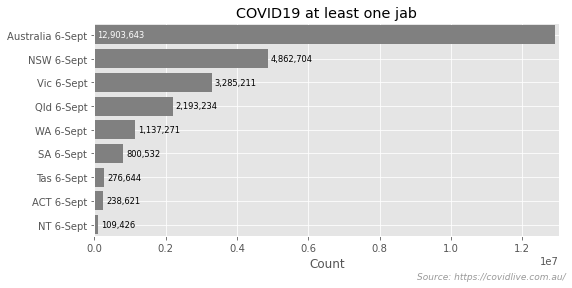

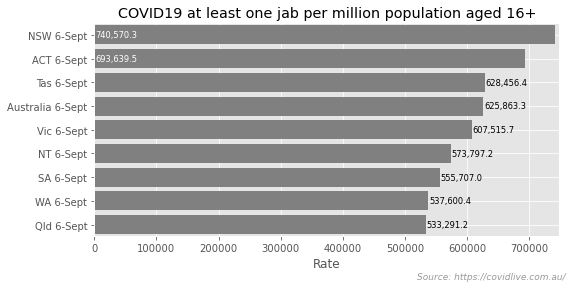

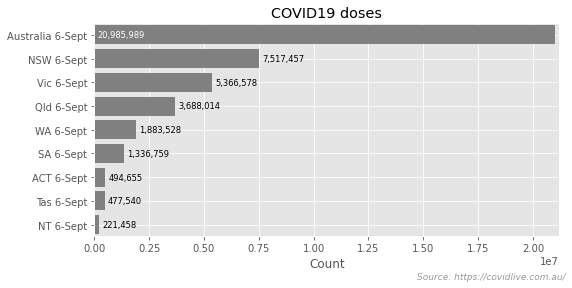

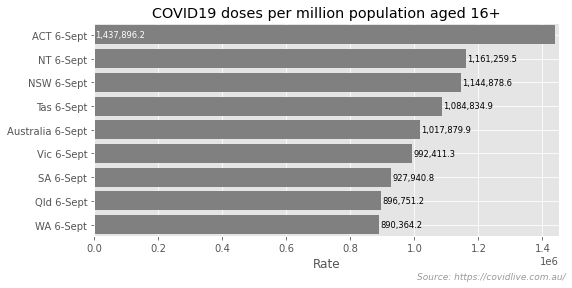

In [80]:
kwargs = {'pop_series': eligible_pop, 'pop_label': 'population aged 16+'}
two_bar_plots(data, 'VACC_PEOPLE_CNT', '', 'fully vaccinated', **kwargs)
two_bar_plots(data, 'VACC_FIRST_DOSE_CNT', '', 'at least one jab', **kwargs)
two_bar_plots(data, 'VACC_DOSE_CNT', '', 'doses', **kwargs)

## The End

In [81]:
print_warnings()
print('Finished')

NOTE: 5 warnings
CASE_CNT mismatch - check  last line of the SOI tables for ['Queensland']
Lastest value less than its predecessor in SRC_UNKNOWN_CNT for Australia, Victoria
Lastest value less than its predecessor in VACC_GP_CNT for NT
Lastest value less than its predecessor in MED_VENT_CNT for Australia, NSW
Lastest value less than its predecessor in ACTIVE_CNT for ACT, WA
Finished
